# Описание проекта

## Задание 0 [25 баллов]
* Найти категорию трат, где по дням был максимальный разброс значений «сумм транзакций» (значения из таблиц)
* Найти категорию трат, где в течение года по дням был максимальный разброс значений «количества транзакций» (значения из таблиц)

Визуализируйте свои выводы в удобном для понимания формате.

## Задание 1 [25 баллов]
Найти категории трат в разбивке по неделям, между количеством транзакций которых была наибольшая корреляция  

Результат предоставьте в формате графика, отражающего общие корреляции всех категорий по неделям (график данного типа изучали на лекции)  

По графику сделайте 3 вывода относительно корреляций категорий   

**Например:** покупка авиабилетов коррелирует с покупкой в супермаркетах, потому что… (тут делаем предположения почему так может быть)

## Задание 2 [50 баллов] 
Проверьте, как отразились на покупках в различных категориях следующие события:
* Принятие коронавирусных мер
* Праздники
* Сезонность

Для этого проверьте следующие гипотезы:
* Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер уменьшилось
* В предновогодний период средний чек вырос
* Весной траты в категории фитнес растут

## Задание 3 [100 баллов] 
В какие месяцы и в каких категориях продаж происходили наибольшие взлеты и падения? [100]

<span style="color:green">__Открытый вопрос__:</span> от Вас требуется проанализировать данные, сформировать не менее 4 гипотез и проверить их — отвергнуть или подтвердить. Примеры гипотез для проверки предложены в задании #2.

Далее идет проверка на данных -> результат с графиками, отражающими проверку гипотезы + интерпретацию результатов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats as st
from datetime import datetime


# Предобработка данных

Данные выглядят не совсем удобными для анализа. Разделим каждый лист на три части: сумма трат, транзакции, средний чек.

In [2]:
days = pd.read_excel(open('dynamics.xlsx', 'rb'), sheet_name='по дням', index_col=0)
weeks = pd.read_excel(open('dynamics.xlsx', 'rb'), sheet_name='по неделям', index_col=0)
months = pd.read_excel(open('dynamics.xlsx', 'rb'), sheet_name='по месяцам', index_col=0)

In [3]:
display(days.head())
print(days.isna().sum(), weeks.isna().sum(), months.isna().sum() )

авиабилеты  автосервис    аптеки      бары  дом, ремонт  \
категория                                                                      
день                 сумма трат         NaN       NaN       NaN          NaN   
2019-01-01 00:00:00    0.010231    0.000343  0.003922  0.002554     0.005662   
2019-01-02 00:00:00    0.012811    0.002439  0.008208  0.002381     0.026357   
2019-01-03 00:00:00    0.013293    0.006182  0.008876  0.002737     0.033407   
2019-01-04 00:00:00    0.014658    0.008501  0.009292  0.002677     0.036214   

                     доставка еды    другое  ж/д билеты  зоомагазины  \
категория                                                              
день                          NaN       NaN         NaN          NaN   
2019-01-01 00:00:00      0.000109  0.051617    0.003117     0.000108   
2019-01-02 00:00:00      0.000151  0.094138    0.004136     0.000935   
2019-01-03 00:00:00      0.000177  0.114822    0.004039     0.001344   
2019-01-04 00:00:00      0.000181  0.119963    0.003979     0.001372   

                     кафе, рестораны  ...  обувь, одежда.2      отели.2  \
категория                             ...                                 
день                             NaN  ...              NaN          NaN   
2019-01-01 00:00:00         0.014802  ...      3571.786182  7379.008285   
2019-01-02 00:00:00         0.020797  ...      3432.844316  8334.479182   
2019-01-03 00:00:00         0.023260  ...      3508.119952  7668.635603   
2019-01-04 00:00:00         0.024240  ...      3507.464290  6951.066888   

                     развлечения.2  супермаркеты.2     театры.2    топливо.2  \
категория                                                                      
день                           NaN             NaN          NaN          NaN   
2019-01-01 00:00:00    1565.656964      534.712369  2056.440760  1072.265434   
2019-01-02 00:00:00    1546.571176      604.508891  2094.517317  1131.905447   
2019-01-03 00:00:00    1629.456501      587.236768  2173.343989  1133.467552   
2019-01-04 00:00:00    1659.407663      597.582976  2196.725825  1142.625344   

                     транспорт.2        туры.2   фастфуд.2     фитнес.2  
категория                                                                
день                         NaN           NaN         NaN          NaN  
2019-01-01 00:00:00   321.496274   9382.603938  574.646502  1749.684460  
2019-01-02 00:00:00   337.488869   8454.888408  547.598172  1813.376172  
2019-01-03 00:00:00   301.906521   9596.168458  532.152586  1931.075823  
2019-01-04 00:00:00   288.072549  10762.061134  526.666040  1898.765747  

[5 rows x 66 columns]

авиабилеты     0
автосервис     1
аптеки         1
бары           1
дом, ремонт    1
              ..
топливо.2      1
транспорт.2    1
туры.2         1
фастфуд.2      1
фитнес.2       1
Length: 66, dtype: int64 авиабилеты     0
автосервис     1
аптеки         1
бары           1
дом, ремонт    1
              ..
топливо.2      1
транспорт.2    1
туры.2         1
фастфуд.2      1
фитнес.2       1
Length: 66, dtype: int64 авиабилеты     0
автосервис     1
аптеки         1
бары           1
дом, ремонт    1
              ..
топливо.2      1
транспорт.2    1
туры.2         1
фастфуд.2      1
фитнес.2       1
Length: 66, dtype: int64


In [4]:
print(days.info(), weeks.info(), months.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, день to 2022-10-31 00:00:00
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   авиабилеты         1401 non-null   object 
 1   автосервис         1400 non-null   float64
 2   аптеки             1400 non-null   float64
 3   бары               1400 non-null   float64
 4   дом, ремонт        1400 non-null   float64
 5   доставка еды       1400 non-null   float64
 6   другое             1400 non-null   float64
 7   ж/д билеты         1400 non-null   float64
 8   зоомагазины        1400 non-null   float64
 9   кафе, рестораны    1400 non-null   float64
 10  кинотеатры         1400 non-null   float64
 11  красота            1400 non-null   float64
 12  обувь, одежда      1400 non-null   float64
 13  отели              1400 non-null   float64
 14  развлечения        1400 non-null   float64
 15  супермаркеты       1400 non-null   float64
 16  театры     

В данных отсутвуют пропуски. Типы данных соответствуют свои значениям. 

In [5]:
days.columns
categ_spend = ['авиабилеты', 'автосервис', 'аптеки', 'бары',
       'дом, ремонт', 'доставка еды', 'другое', 'ж/д билеты', 'зоомагазины',
       'кафе, рестораны', 'кинотеатры', 'красота', 'обувь, одежда', 'отели',
       'развлечения', 'супермаркеты', 'театры', 'топливо', 'транспорт', 'туры',
       'фастфуд', 'фитнес']
categ_transactions = ['авиабилеты.1', 'автосервис.1', 'аптеки.1',
       'бары.1', 'дом, ремонт.1', 'доставка еды.1', 'другое.1', 'ж/д билеты.1',
       'зоомагазины.1', 'кафе, рестораны.1', 'кинотеатры.1', 'красота.1',
       'обувь, одежда.1', 'отели.1', 'развлечения.1', 'супермаркеты.1',
       'театры.1', 'топливо.1', 'транспорт.1', 'туры.1', 'фастфуд.1',
       'фитнес.1']
categ_check = ['авиабилеты.2', 'автосервис.2', 'аптеки.2', 'бары.2',
       'дом, ремонт.2', 'доставка еды.2', 'другое.2', 'ж/д билеты.2',
       'зоомагазины.2', 'кафе, рестораны.2', 'кинотеатры.2', 'красота.2',
       'обувь, одежда.2', 'отели.2', 'развлечения.2', 'супермаркеты.2',
       'театры.2', 'топливо.2', 'транспорт.2', 'туры.2', 'фастфуд.2',
       'фитнес.2']

 Разделим датасет при помощи трех функций.

In [6]:
def get_spending(df): 
    df = df.drop(df.index[0])
    res = df[categ_spend]
    res.columns = categ_spend
    res = res.reset_index()
    res = res.rename(columns=({'категория': 'дата'}))
    return res

def get_transactions(df): 
    df = df.drop(df.index[0])
    res = df[categ_transactions]
    res.columns = categ_spend
    res = res.reset_index()
    res = res.rename(columns=({'категория': 'дата'}))
    return res
    
def get_mean_check(df): 
    df = df.drop(df.index[0])
    res = df[categ_check]
    res.columns = categ_spend
    res = res.reset_index()
    res = res.rename(columns=({'категория': 'дата'}))
    return res


In [7]:
day_sp = get_spending(days)
day_tr = get_transactions(days)
day_mc = get_mean_check(days)
display(day_mc.head())

дата    авиабилеты   автосервис      аптеки         бары  дом, ремонт  \
0 2019-01-01  11399.071102  1235.336931  533.112383   999.333513  4124.509235   
1 2019-01-02   10870.40352  1733.263152  579.865278   978.836295  3521.010076   
2 2019-01-03  10791.392744  2142.467039  591.103482  1032.163795  3333.948962   
3 2019-01-04  11476.564111  2371.758174  598.658270  1036.854424  3282.052356   
4 2019-01-05  11101.994139  2461.109026  608.553209   983.346705  3280.778720   

   доставка еды       другое   ж/д билеты  зоомагазины  ...  обувь, одежда  \
0   1225.740431  1410.320490  2596.226457  1283.881179  ...    3571.786182   
1   1196.223850  1753.838817  2666.984655   891.033020  ...    3432.844316   
2   1137.866905  1932.796604  2616.347101   928.519882  ...    3508.119952   
3   1260.821294  1954.891151  2563.759111   915.355889  ...    3507.464290   
4   1301.049275  1940.806702  2475.230279   862.878566  ...    3537.461768   

         отели  развлечения  супермаркеты       театры      топливо  \
0  7379.008285  1565.656964    534.712369  2056.440760  1072.265434   
1  8334.479182  1546.571176    604.508891  2094.517317  1131.905447   
2  7668.635603  1629.456501    587.236768  2173.343989  1133.467552   
3  6951.066888  1659.407663    597.582976  2196.725825  1142.625344   
4  6867.597705  1622.228587    611.411951  2249.082773  1140.087413   

    транспорт          туры     фастфуд       фитнес  
0  321.496274   9382.603938  574.646502  1749.684460  
1  337.488869   8454.888408  547.598172  1813.376172  
2  301.906521   9596.168458  532.152586  1931.075823  
3  288.072549  10762.061134  526.666040  1898.765747  
4  286.418166  11604.758873  525.693799  1844.312659  

[5 rows x 23 columns]

In [8]:
week_sp = get_spending(weeks)
week_tr = get_transactions(weeks)
week_mc = get_mean_check(weeks)
display(week_sp.head())

дата авиабилеты  автосервис    аптеки      бары  дом, ремонт  \
0 2019-01-07   0.024433    0.013736  0.013592  0.002366     0.045840   
1 2019-01-14   0.031229    0.015156  0.014172  0.002117     0.044735   
2 2019-01-21   0.030714    0.016140  0.014659  0.002220     0.044945   
3 2019-01-28   0.036349    0.015140  0.015154  0.002381     0.044931   
4 2019-02-04   0.032507    0.014956  0.015442  0.002509     0.043771   

   доставка еды    другое  ж/д билеты  зоомагазины  ...  обувь, одежда  \
0      0.000312  0.174018    0.004113     0.002239  ...       0.054040   
1      0.000312  0.186860    0.004434     0.002293  ...       0.047868   
2      0.000333  0.180726    0.004584     0.002338  ...       0.045796   
3      0.000353  0.182433    0.004811     0.002461  ...       0.046813   
4      0.000393  0.175548    0.005077     0.002396  ...       0.045254   

      отели  развлечения  супермаркеты    театры   топливо  транспорт  \
0  0.015458     0.005422      0.134761  0.002810  0.027309   0.014817   
1  0.013360     0.004674      0.134864  0.002978  0.027110   0.014933   
2  0.013322     0.004520      0.139376  0.003059  0.028473   0.015378   
3  0.014362     0.005055      0.139300  0.003342  0.027614   0.015558   
4  0.014583     0.004899      0.140558  0.003385  0.027706   0.016403   

       туры   фастфуд    фитнес  
0  0.006254  0.025346  0.004553  
1  0.007399  0.026831  0.004692  
2  0.008205  0.027198  0.004548  
3  0.008802  0.026762  0.005695  
4  0.008129  0.027114  0.003943  

[5 rows x 23 columns]

In [9]:
month_sp = get_spending(months)
month_tr = get_transactions(months)
month_mc = get_mean_check(months)
display(month_tr.head())

дата авиабилеты  автосервис    аптеки      бары  дом, ремонт  \
0 2019-01-01   0.002339    0.005226  0.023855  0.002817     0.014126   
1 2019-02-01   0.002344    0.005201  0.023339  0.002814     0.013664   
2 2019-03-01   0.002694    0.006156  0.023821  0.003292     0.015624   
3 2019-04-01   0.002573    0.007816  0.023946  0.003151     0.015813   
4 2019-05-01   0.002436    0.006740  0.022286  0.003516     0.017970   

   доставка еды    другое  ж/д билеты  зоомагазины  ...  обувь, одежда  \
0      0.000278  0.094880    0.002037     0.002387  ...       0.016076   
1      0.000295  0.093291    0.002023     0.002362  ...       0.014622   
2      0.000320  0.103545    0.002307     0.002617  ...       0.017597   
3      0.000325  0.100358    0.002684     0.002681  ...       0.017715   
4      0.000329  0.102786    0.002713     0.002656  ...       0.019657   

      отели  развлечения  супермаркеты    театры   топливо  транспорт  \
0  0.002213     0.003291      0.252338  0.001166  0.025601   0.059711   
1  0.002056     0.002844      0.251170  0.001091  0.024162   0.062506   
2  0.002315     0.003281      0.276647  0.001264  0.026414   0.068853   
3  0.002346     0.003078      0.287290  0.000935  0.027283   0.070940   
4  0.002523     0.003583      0.308792  0.000937  0.029836   0.071155   

       туры   фастфуд    фитнес  
0  0.000449  0.071811  0.001934  
1  0.000460  0.075504  0.001829  
2  0.000517  0.083888  0.001897  
3  0.000546  0.090267  0.001638  
4  0.000557  0.089863  0.001497  

[5 rows x 23 columns]

###### Теперь данные приведены к удобному для анализа виду

# Задание 0

* Найти категорию трат, где по дням был максимальный разброс значений «сумм транзакций» (значения из таблиц) (сумма трат ?) 

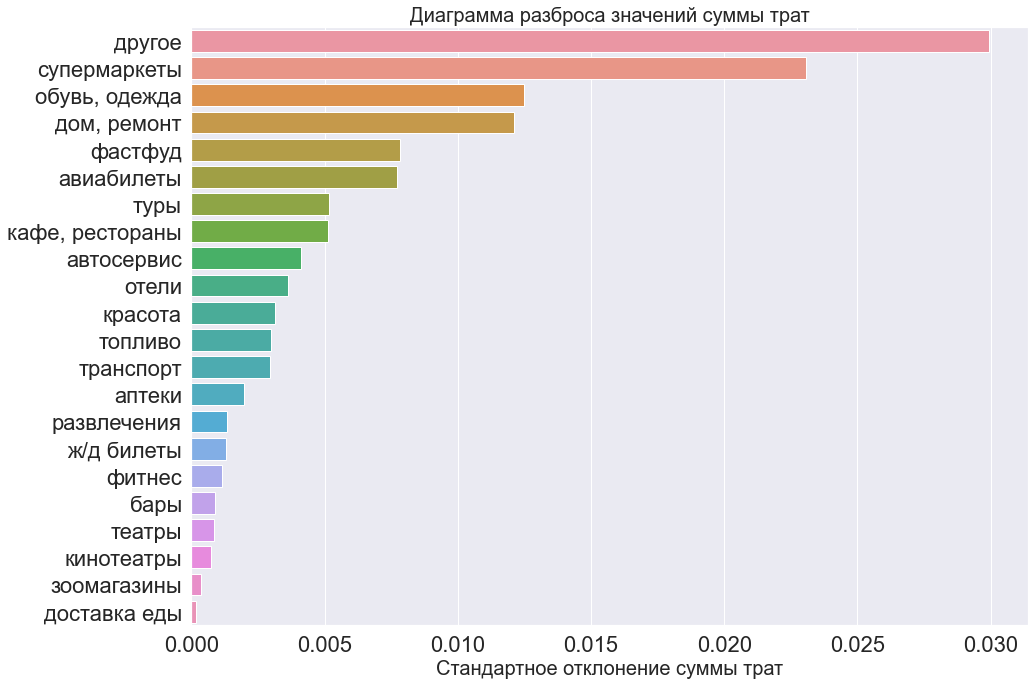

топ 3 категории с максимальным разбросом количества транзакций:
*  другое 0.029925732938570097
*  супермаркеты 0.023084236099272362
*  обувь, одежда 0.012472800634565339


In [10]:
data = day_sp.drop('дата', axis=1)
transactions = list(zip(data.columns, data.std()))
transactions.sort(key=lambda tup: tup[1], reverse=True)
x = list(map(lambda tup: tup[1], transactions))
y = list(map(lambda tup: tup[0], transactions))
plt.figure(figsize=(15,11))
sns.set(font_scale = 2)
ax = sns.barplot(x=x, y=y)

ax.set_xlabel("Стандартное отклонение суммы трат",fontsize=20)
ax.set_title('Диаграмма разброса значений суммы трат',fontdict= { 'fontsize': 20})
plt.show()
print('топ 3 категории с максимальным разбросом количества транзакций:')
for i in range(3): 
    print('* ', *transactions[i])

In [11]:
s = data.std()
print(s.sort_values(ascending=False).index)

Index(['другое', 'супермаркеты', 'обувь, одежда', 'дом, ремонт', 'фастфуд',
       'авиабилеты', 'туры', 'кафе, рестораны', 'автосервис', 'отели',
       'красота', 'топливо', 'транспорт', 'аптеки', 'развлечения',
       'ж/д билеты', 'фитнес', 'бары', 'театры', 'кинотеатры', 'зоомагазины',
       'доставка еды'],
      dtype='object')


* Найти категорию трат, где в течение года по дням был максимальный разброс значений «количества транзакций» (значения из таблиц)

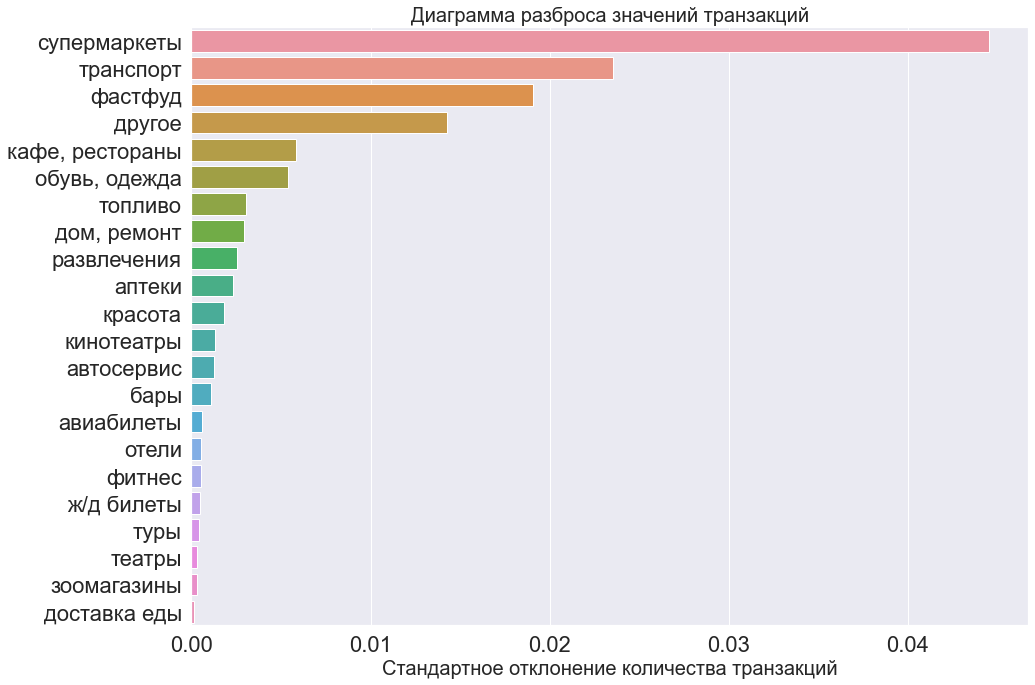

топ 3 категории с максимальным разбросом количества транзакций:
*  супермаркеты 0.04449982550208819
*  транспорт 0.023547787507804795
*  фастфуд 0.01907348247191331


In [12]:
data = day_tr.drop('дата', axis=1)
transactions = list(zip(data.columns, data.std()))
transactions.sort(key=lambda tup: tup[1], reverse=True)
x = list(map(lambda tup: tup[1], transactions))
y = list(map(lambda tup: tup[0], transactions))
plt.figure(figsize=(15,11))
sns.set(font_scale = 2)
ax = sns.barplot(x=x, y=y)

ax.set_xlabel("Стандартное отклонение количества транзакций",fontsize=20)
ax.set_title('Диаграмма разброса значений транзакций',fontdict= { 'fontsize': 20})
plt.show()
print('топ 3 категории с максимальным разбросом количества транзакций:')
for i in range(3): 
    print('* ', *transactions[i])

# Задание 1

* Найти категории трат в разбивке по неделям, между количеством транзакций которых была наибольшая корреляция

In [13]:
data = week_tr.drop('дата', axis=1)
corr = data.corr()
display(corr.style.background_gradient(cmap='RdYlGn'))
categories = []
for i, categ in enumerate(corr.columns): 
    for j in range(i, len(corr.columns)): 
        if abs(corr[categ][j]) > 0.85 and i != j: 
            print(categ,'--', corr.index[j],'| corr = ', corr[categ][j])
            categories.append(categ)
            categories.append(corr.index[j])
            

бары -- ж/д билеты | corr =  0.8585591945390123
кафе, рестораны -- отели | corr =  0.8791397767237519
развлечения -- туры | corr =  0.8685416937265777
супермаркеты -- туры | corr =  0.8512616719748896
транспорт -- фастфуд | corr =  0.8590399773558568


* Результат предоставьте в формате графика, отражающего общие корреляции всех категорий по неделям

* По графику сделайте 3 вывода относительно корреляций категорий

Нарисуем графики зависимости наиболее коррелирующих категорий

In [14]:
categories = list(set(categories))
data1 = data.loc[:, categories]

In [15]:
corr = data1.corr()
display(corr.style.background_gradient(cmap='RdYlGn'))

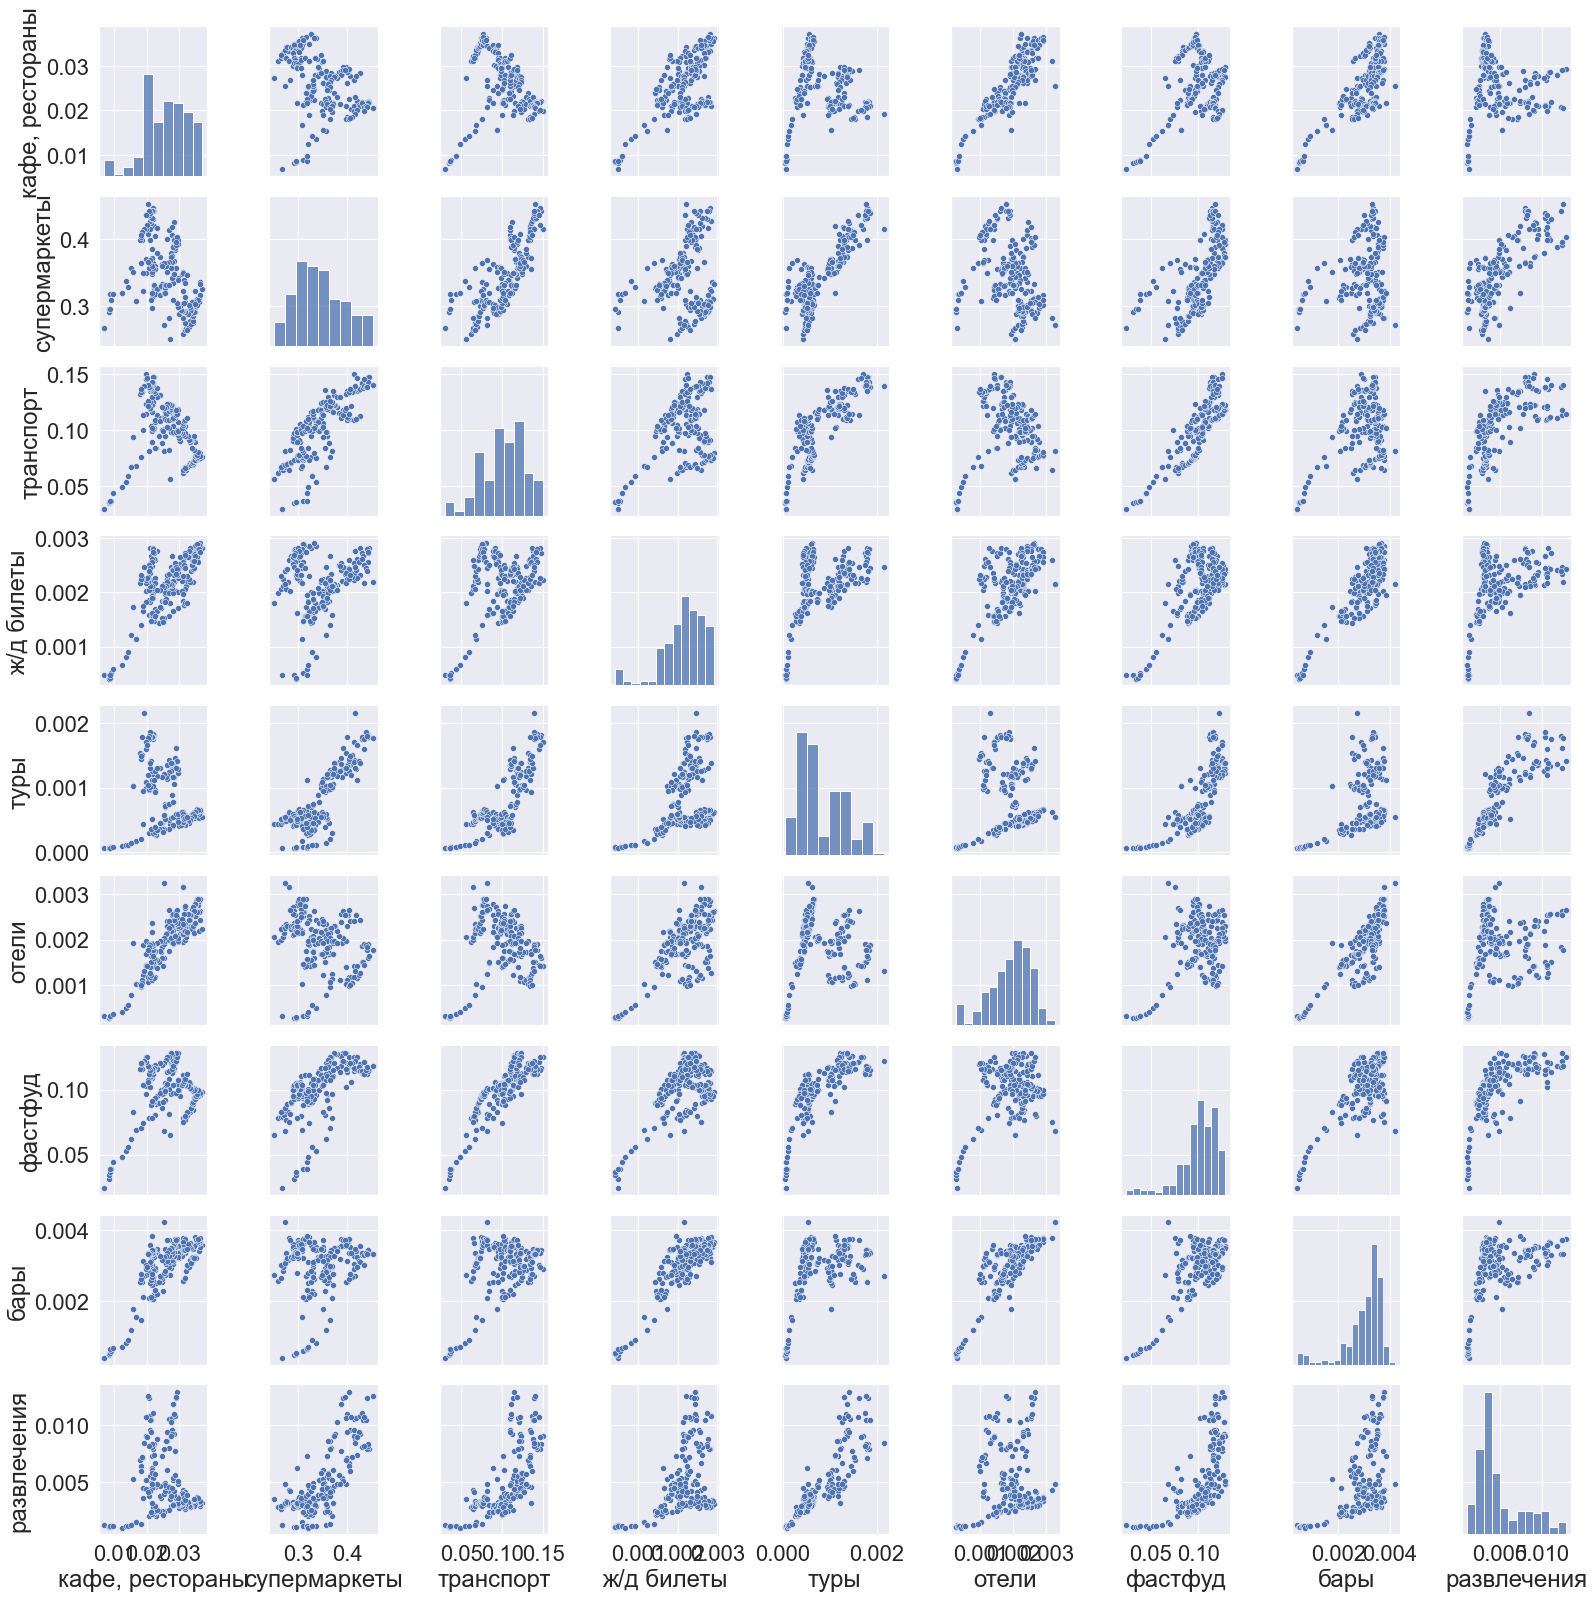

In [16]:
sns.pairplot(data1);

* Категория 'бары' корреллирует с категорией 'жд билеты' (corr = 0.86). Возможно, это связано с тем, что во время матчей по каким либо видам спорта большое количество людей болеет в барах за свои команды. В то же время многие люди покупают билеты, чтобы лично посетить матч.



* Категория 'транспорт' коррелирует с категорией 'фастфуд' (corr = 0.86). Обычно, если человек уезжает из дома более чем на 2 часа, то ему нужно есть, а фастфуд является самым распространенным видом перекуса. 



* Категория 'кафе рестораны' коррелирует с категорией 'отели' (corr = 0.88). Есть предположение, что человек, который посещает отели, вряд ли будет заморачиваться самостоятельным приготовлением еды и сделает свой выбор в пользу кафе или ресторана. 

# Задание 2

Проверьте, как отразились на покупках в различных категориях следующие события:

* Принятие коронавирусных мер
* Праздники
* Сезонность


Для этого проверьте следующие гипотезы:

* * Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер уменьшилось
* * В предновогодний период средний чек вырос
* * Весной траты в категории фитнес растут

### Гипотеза 1

* $ H_0$ : Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер осталось прежним или увеличилось.

* $ H_1$ : Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер уменьшилось.


Будем считать датой начала введения карантинных ограничений 30 марта 2020г. 

Сначала посмотрим на график транзакций по месяцам. А для более точной проверки гипотезы возьмем данные по дням, выделим два массива: один массив будет содержать данные о количестве транзакций за ~4 месяцах до ограничительных мер, а второй - после. 

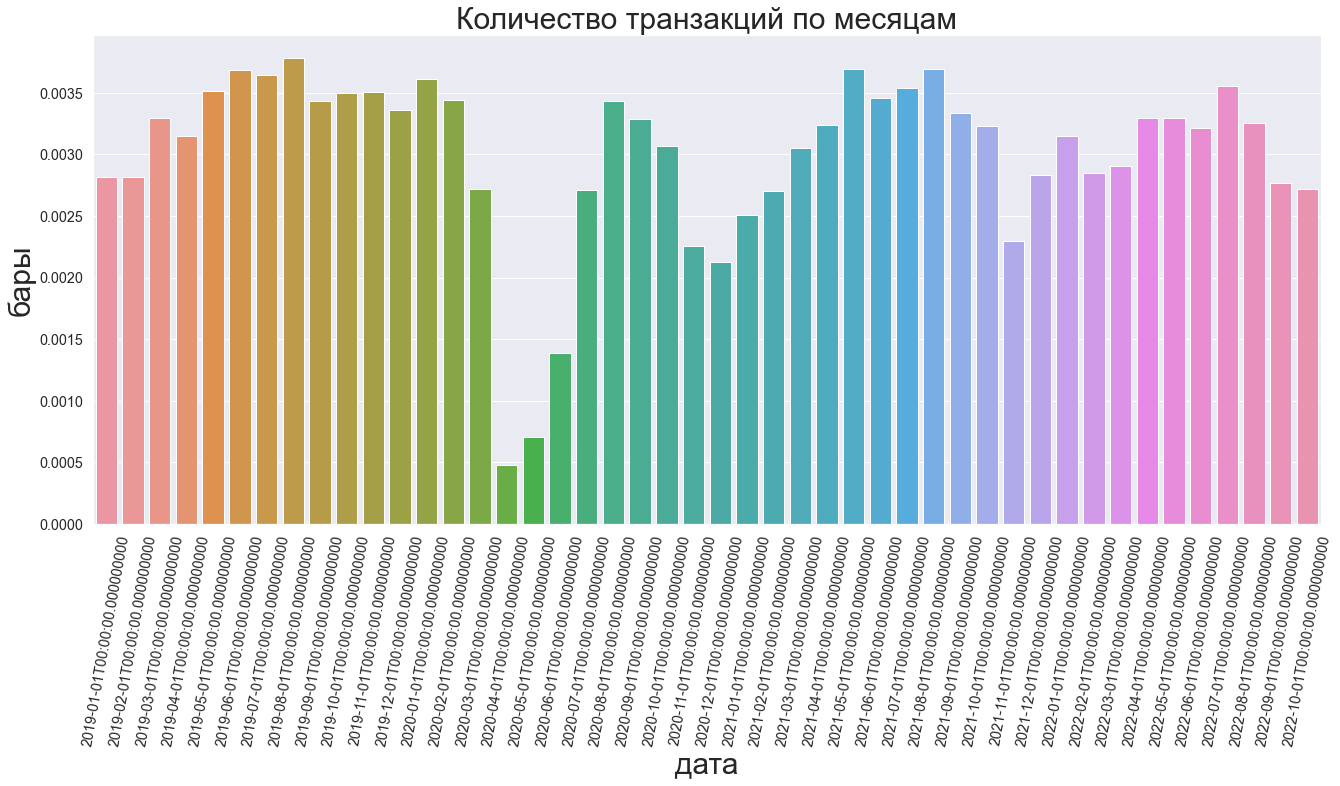

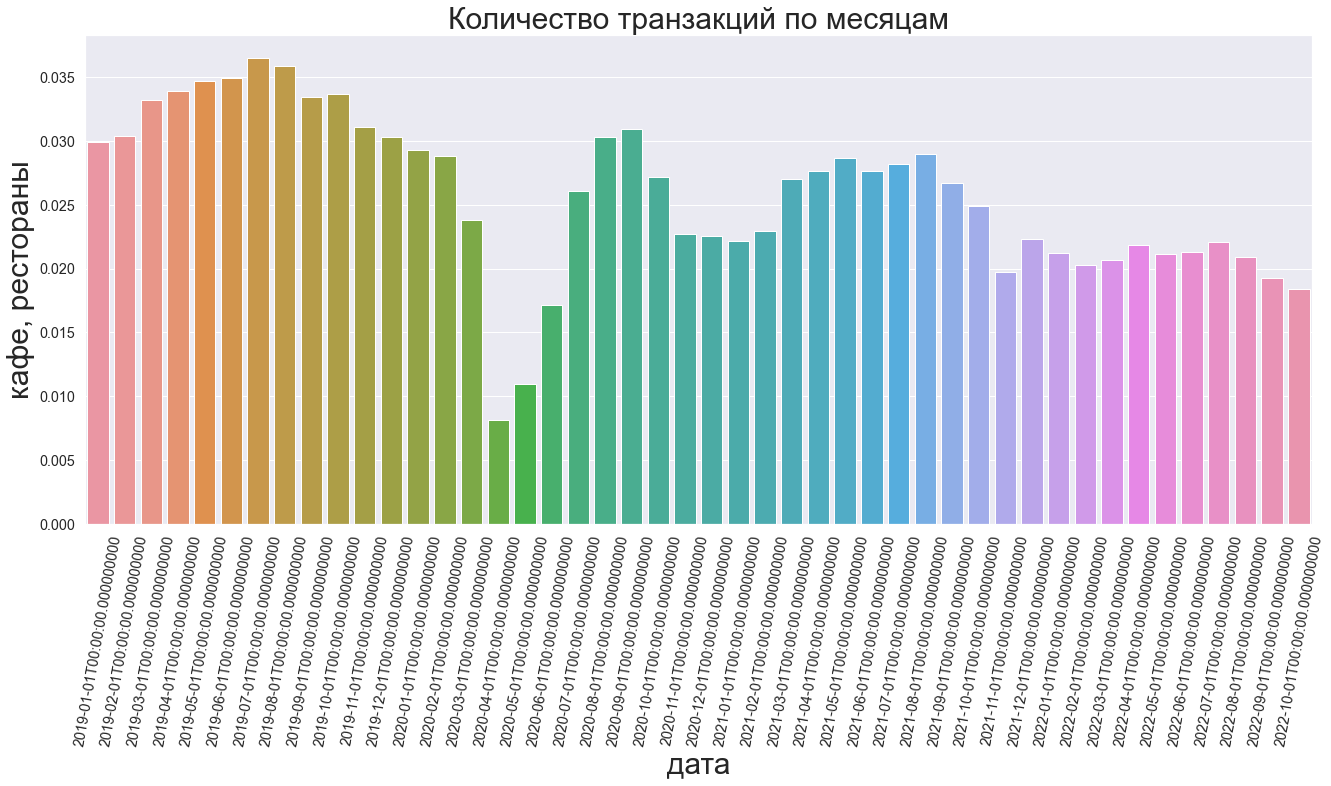

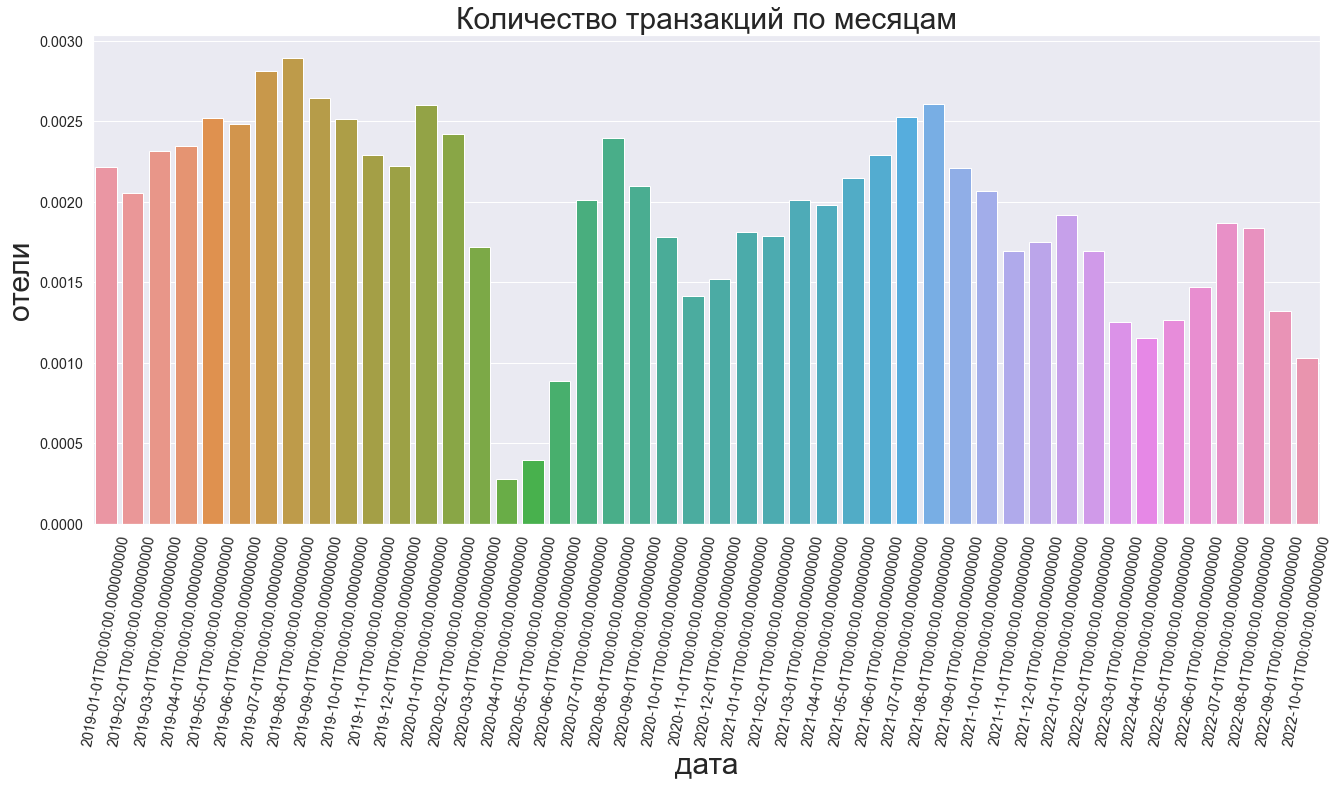

In [17]:
data = month_tr
categ = ['бары', 'кафе, рестораны', 'отели']

for category in categ:
    plt.figure(figsize=(22,9))
    sns.set(font_scale = 1.3)
    ax = sns.barplot(x=data['дата'],y=data[category])
    plt.xticks(rotation=80)
    ax.set_title('Количество транзакций по месяцам', fontsize=30)
    ax.set_ylabel(category, fontsize=30)
    ax.set_xlabel('дата', fontsize=30)
    plt.show(ax)

In [18]:
data = day_tr

start1 = datetime(2019, 12, 1) 
finish1 = datetime(2020, 3, 30)

start2 = datetime(2020, 3, 30)
finish2 = datetime(2020, 8, 1)
date = pd.DatetimeIndex(data['дата'])
data_before = data.query('(дата > @start1) & (дата < @finish1)')
data_after = data.query('(дата > @start2) & (дата < @finish2)')

Односторонний тест Стьюдента (для независимых выборок) на уровне значимости 95%

In [19]:
categ = ['бары', 'кафе, рестораны', 'отели']
level = 0.05
for category in categ: 
    before = np.array(data_before[category])
    after = np.array(data_after[category])
    results = st.ttest_ind(before, after, equal_var=False)
    p_value = results.pvalue
    print(category, ':','p_value =', p_value)
    if (p_value < level * 2) and (data_after[category].mean() < data_before[category].mean()): 
        print(f'Отвергаем нулевую гипотезу. Количество транзакций в категории {category} после принятия коронавирусных мер уменьшилось.')
        print()
    else: 
        print(f'Не получилось отвергнуть нулевую гипотезу для категории {category}.')
        print()

бары : p_value = 3.200095777941243e-29
Отвергаем нулевую гипотезу. Количество транзакций в категории бары после принятия коронавирусных мер уменьшилось.

кафе, рестораны : p_value = 1.4921247342724334e-39
Отвергаем нулевую гипотезу. Количество транзакций в категории кафе, рестораны после принятия коронавирусных мер уменьшилось.

отели : p_value = 1.9827317322505473e-43
Отвергаем нулевую гипотезу. Количество транзакций в категории отели после принятия коронавирусных мер уменьшилось.



### Гипотеза 2
* $ H_0$ : В предновогодний период средний чек не изменился или уменьшился.

* $ H_1$ : В предновогодний период средний чек вырос


Для проверки гипотезы выделим несколько категорий. Например: 'фастфуд', 'обувь, одежда', 'фитнес', 'супермаркеты'

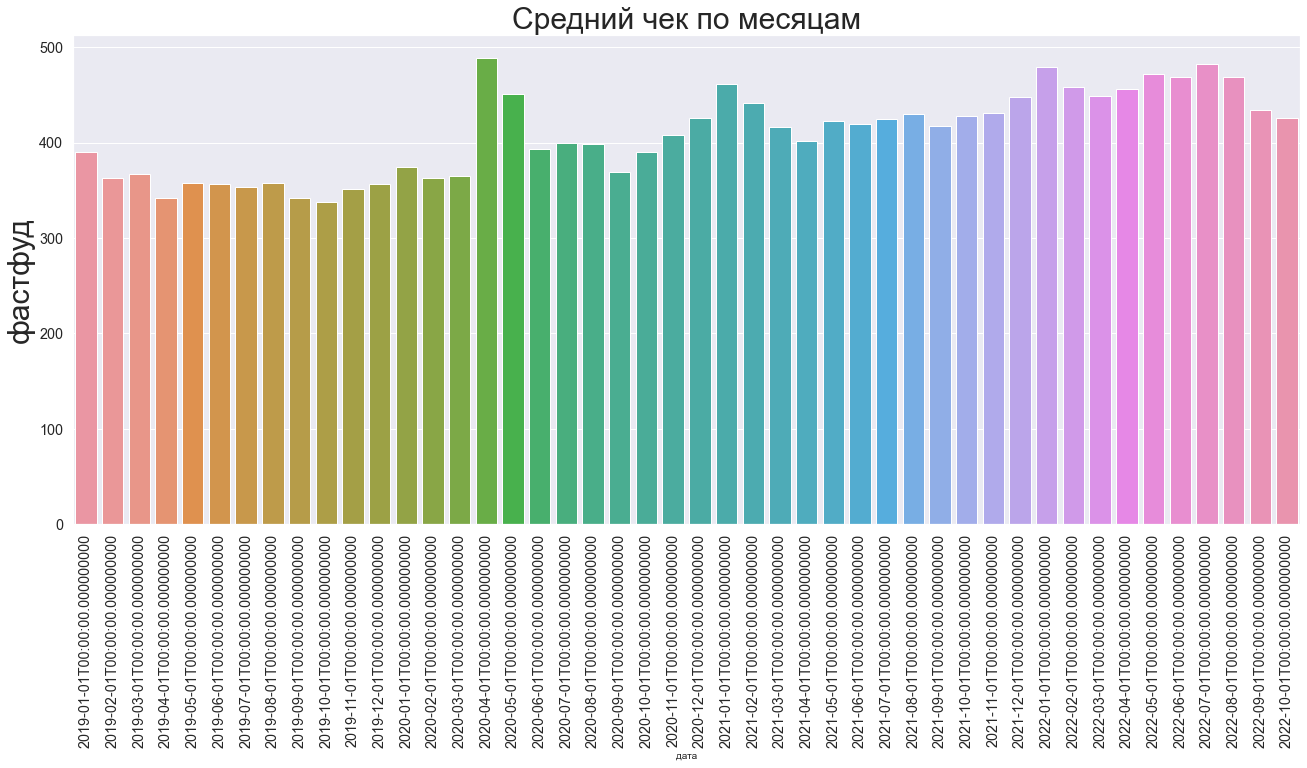

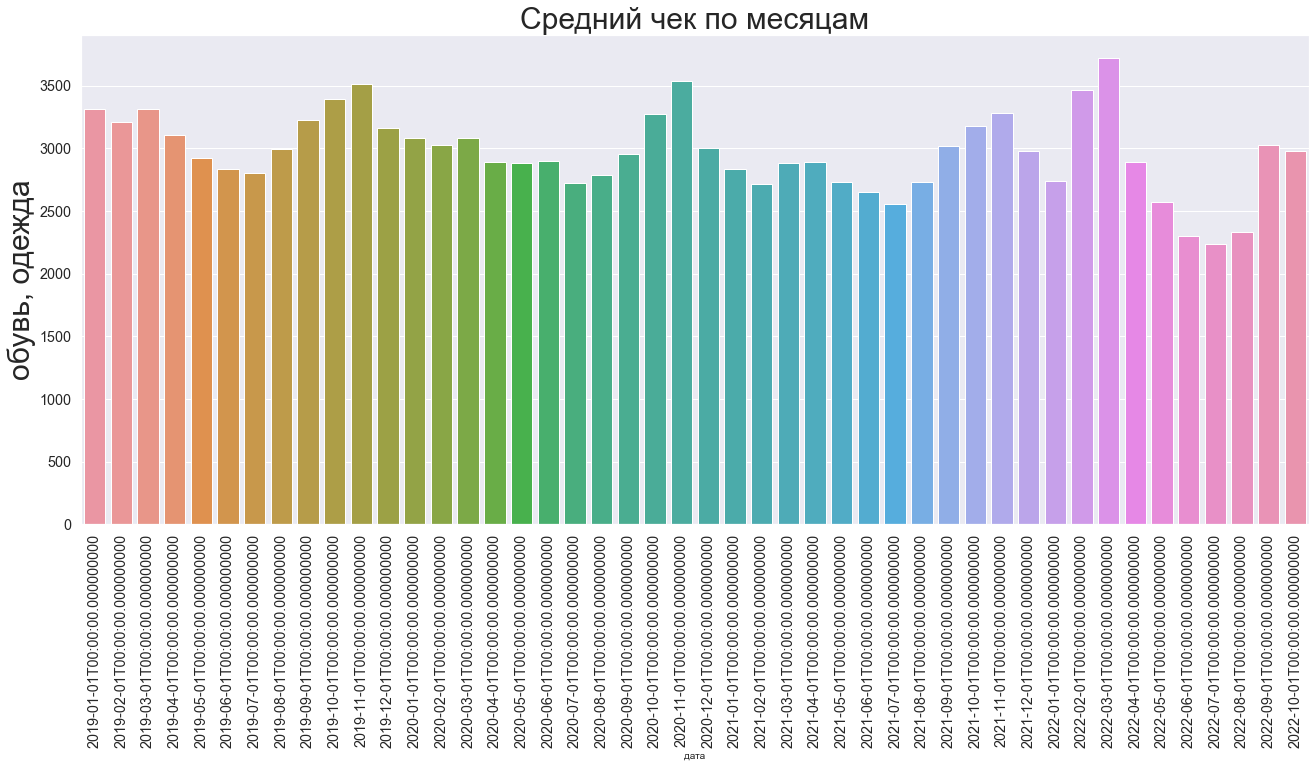

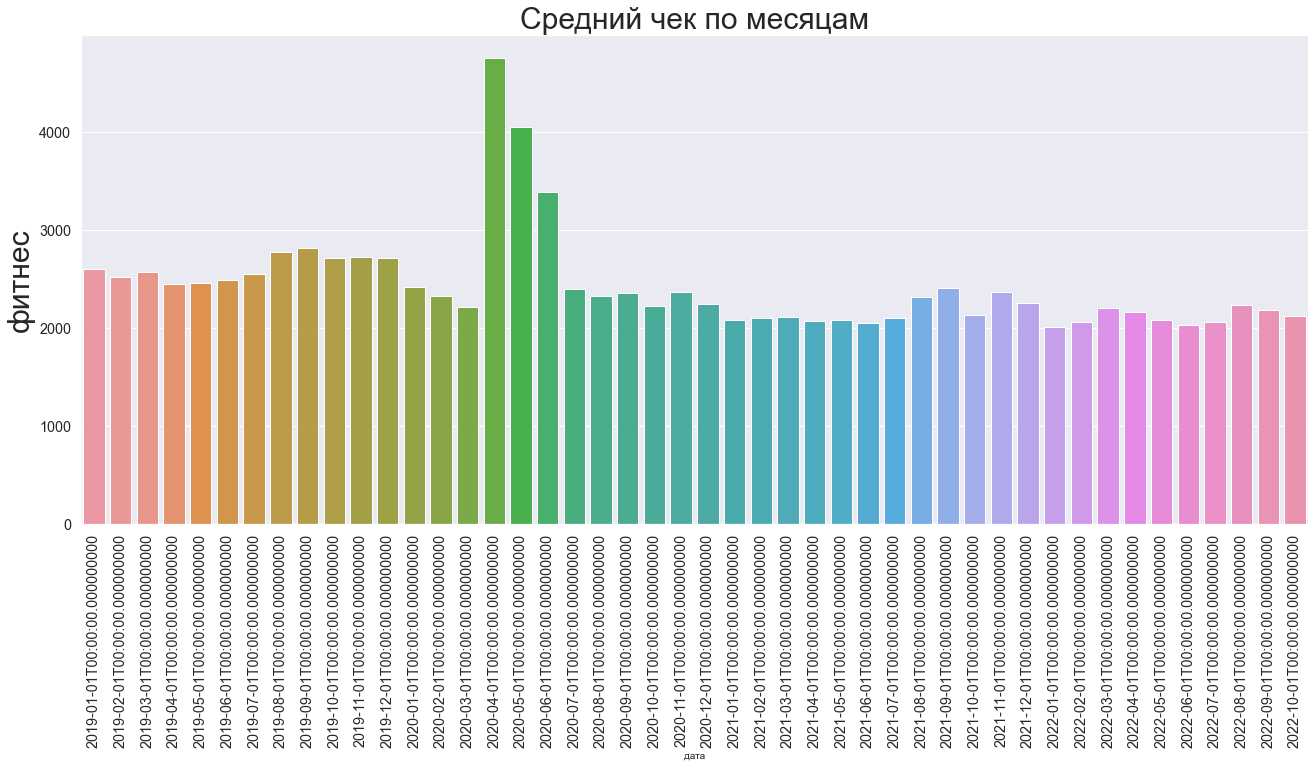

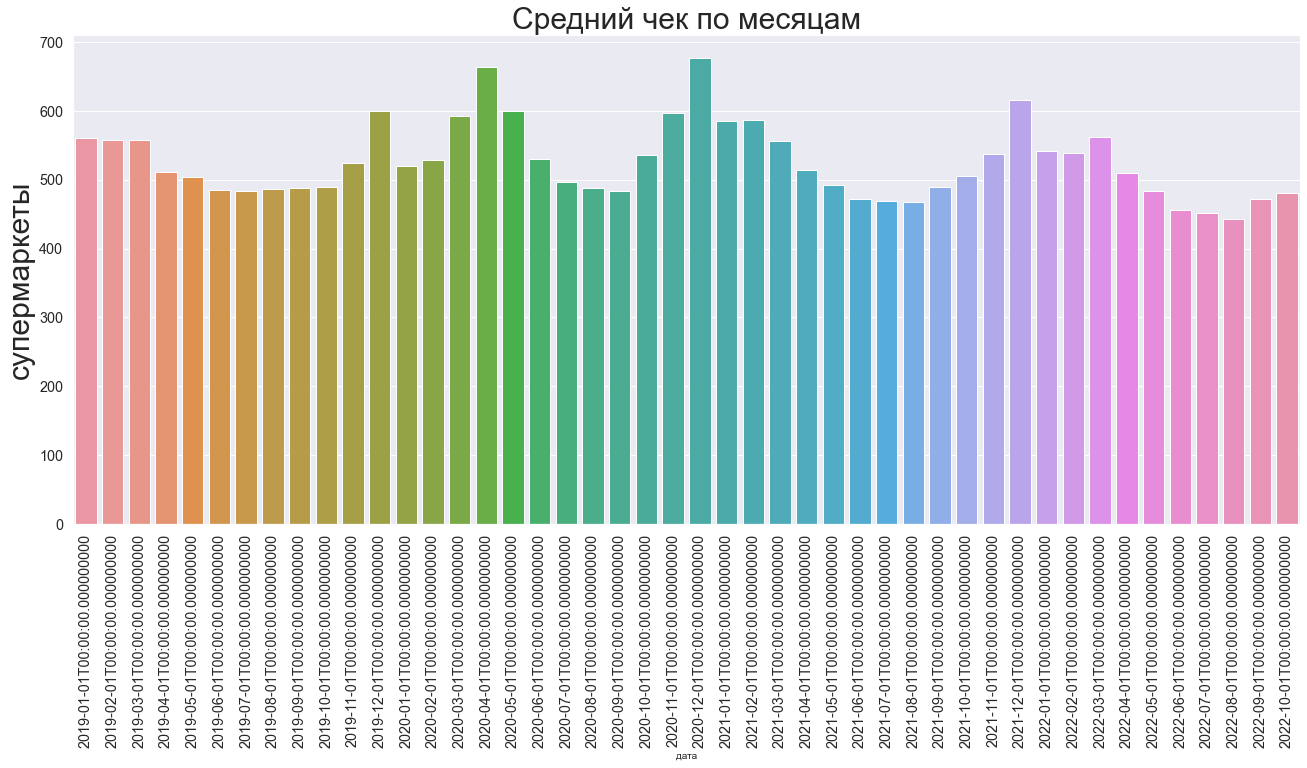

In [20]:
data = month_mc
categ = ['фастфуд', 'обувь, одежда', 'фитнес', 'супермаркеты']
for category in categ: 
    plt.figure(figsize=(22,9))
    sns.set(font_scale = 1.3)
    ax = sns.barplot(x=data['дата'],y=data[category])
    plt.xticks(rotation=90)
    ax.set_title('Средний чек по месяцам', fontsize=30)
    ax.set_ylabel(category, fontsize=30)
    ax.set_xlabel('дата', fontsize=10)
    plt.show(ax)

Из диаграмм видно, в категориях супермаркеты и обувь/одежда наблюдаются пики в районе зимних месяцев. 

Проверим гипотезу при помощи теста Стьюдента. Возьмем 2019 и 2020 годы, выделим две выборки. Первая выборка: с 15 ноября по 31 декабря, вторая: с 1 октября по 15 ноября. 

Почему так выбрал? Нелья выбирать вторую выборку большого промежутка времения, потому что в такой промежуток могут войти другие праздники или значимые события, которые повлияют на выборку непредновогоднего периода

In [21]:
data = day_mc
level = 0.05
for category in categ: 
    table = pd.DataFrame({'year': [2019, 2020, 2021], 'H0':[0, 0, 0], 'H1':[0, 0, 0], 'p_value': [0, 0, 0], 
                         'средний чек задолго до НГ': [0, 0, 0], 'средний чек перед НГ': [0, 0, 0]})
    for i in [2019, 2020, 2021]:
        
        date1_start = datetime(i, 9, 1)
        date1_finish = datetime(i, 11, 15)
        date2_start = datetime(i, 11, 15)
        date2_finish = datetime(i+1, 1, 1)
        
        new_year = data.query('(дата < @date2_finish) & (дата > @date2_start)')
        not_new_year = data.query('(дата < @date1_finish) & (дата > @date1_start)')
        
        before = np.array(not_new_year[category])
        after = np.array(new_year[category])
        
        results = st.ttest_ind(before, after, equal_var=False)
        p_value = results.pvalue
        
        table.loc[i-2019, 'p_value'] = p_value.round(3)
        table.loc[i-2019, 'средний чек задолго до НГ'] = before.mean().round()
        table.loc[i-2019, 'средний чек перед НГ'] = after.mean().round()
        
        if (p_value < level * 2) and (before.mean() < after.mean()): 
            table.loc[i-2019, 'H0'] = '-'
            table.loc[i-2019, 'H1'] = '+'
        else: 
            table.loc[i-2019, 'H0'] = '+'
            table.loc[i-2019, 'H1'] = '-'
    print(category, ':')
    display(table)

фастфуд :


year H0 H1  p_value  средний чек задолго до НГ  средний чек перед НГ
0  2019  +  -    0.255                        349                   364
1  2020  -  +    0.004                        386                   422
2  2021  +  -    0.376                        431                   443

обувь, одежда :


year H0 H1  p_value  средний чек задолго до НГ  средний чек перед НГ
0  2019  +  -    0.231                       3331                  3280
1  2020  +  -    0.671                       3172                  3197
2  2021  +  -    0.980                       3104                  3103

фитнес :


year H0 H1  p_value  средний чек задолго до НГ  средний чек перед НГ
0  2019  +  -    0.196                       2656                  2848
1  2020  +  -    0.162                       2225                  2380
2  2021  +  -    0.416                       2248                  2327

супермаркеты :


year H0 H1  p_value  средний чек задолго до НГ  средний чек перед НГ
0  2019  -  +        0                        492                   572
1  2020  -  +        0                        524                   647
2  2021  -  +        0                        506                   583

В ходе проведения t-теста выяснилось, средний чек в супермаркетах и в магазинах обуви и одежды увеличивается в предновогодний период. В остальных рассматриваемых категориях такой тенденции не наблюдается. 

### Гипотеза 3
* $ H_0$  : Весной траты в категории фитнес уменьшаются или остаются неизменными

* $ H_1$  : Весной траты в категории фитнес растут

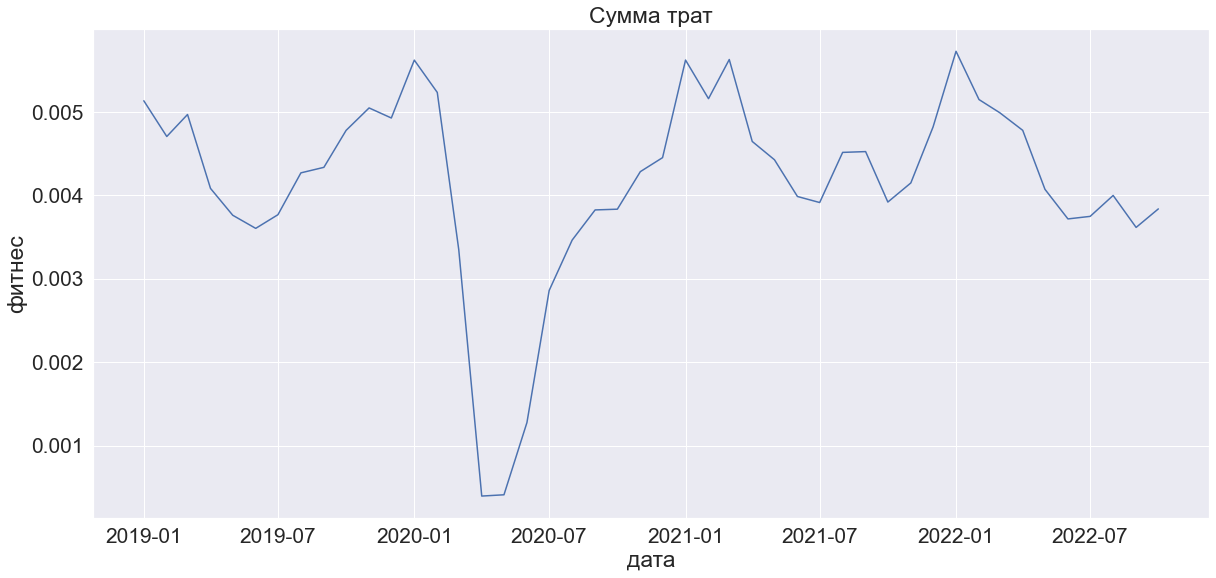

In [22]:
data = month_sp
plt.figure(figsize = (20, 9))
sns.set(font_scale=(1.9))
ax = sns.lineplot(data=data, x="дата", y="фитнес" )
ax.set_title('Сумма трат')
plt.show()

Из графика нельзя сделать вывод, что траты на фитнес весной растут, пики по тратам чаще приходятся на начало года. Проверим гипотезу при помощи теста Стьюдента.

In [23]:
table = pd.DataFrame({'year': [2019, 2020, 2021], 'H0':[0, 0, 0], 'H1':[0, 0, 0], 'p_value': [0, 0, 0], 
                         'траты весной * 1000': [0, 0, 0], 'траты в другое время года * 1000': [0, 0, 0]})
category = 'фитнес'
level = 0.05
for i in [2019, 2020, 2021]:
    date1_start = datetime(i, 3, 1)
    date1_finish = datetime(i, 6, 1)
    date2_start = datetime(i, 6, 1)
    date2_finish = datetime(i+1, 4, 1)
        
    not_spring = data.query('(дата < @date2_finish) & (дата > @date2_start)')
    spring = data.query('(дата < @date1_finish) & (дата > @date1_start)')
        
    before = np.array(spring[category])
    after = np.array(not_spring[category])
        
    results = st.ttest_ind(before, after, equal_var=False)
    p_value = results.pvalue
        
    table.loc[i-2019, 'p_value'] = p_value.round(3)
    table.loc[i-2019, 'траты весной * 1000'] = before.mean() * 1000
    table.loc[i-2019, 'траты в другое время года * 1000'] = after.mean() * 1000
        
    if (p_value < level * 2) and (before.mean() > after.mean()): 
        table.loc[i-2019, 'H0'] = '-'
        table.loc[i-2019, 'H1'] = '+'
    else: 
        table.loc[i-2019, 'H0'] = '+'
        table.loc[i-2019, 'H1'] = '-'
print(category, ':')
display(table)

фитнес :


year H0 H1  p_value  траты весной * 1000  траты в другое время года * 1000
0  2019  +  -    0.058             3.923786                          4.594281
1  2020  +  -    0.000             0.401445                          4.349336
2  2021  +  -    0.681             4.538279                          4.636094

* В каждом году траты на фитнес весной не провосходили трат в другое время года.
* Отметим, что в 2020 году траты на фитнес весной резко снизились - скорее всего, это связано с коронавирусными ограничениями. 

Мы не можем отвергнуть нулевую гипотезу

# Задание 3
В какие месяцы и в каких категориях продаж происходили наибольшие взлеты и падения?

<span style="color:green">__Открытый вопрос__:</span> от Вас требуется проанализировать данные, сформировать не менее 4 гипотез и проверить их — отвергнуть или подтвердить.

* Для начала построим графики среднего чека и количества транзакций для каждой категории и выберем те, в которых происходили сильные изменения. 

/var/folders/yt/cv88rcqd7l5fcmjbgdqfg_6c0000gn/T/ipykernel_71113/4113830690.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(30, 10))


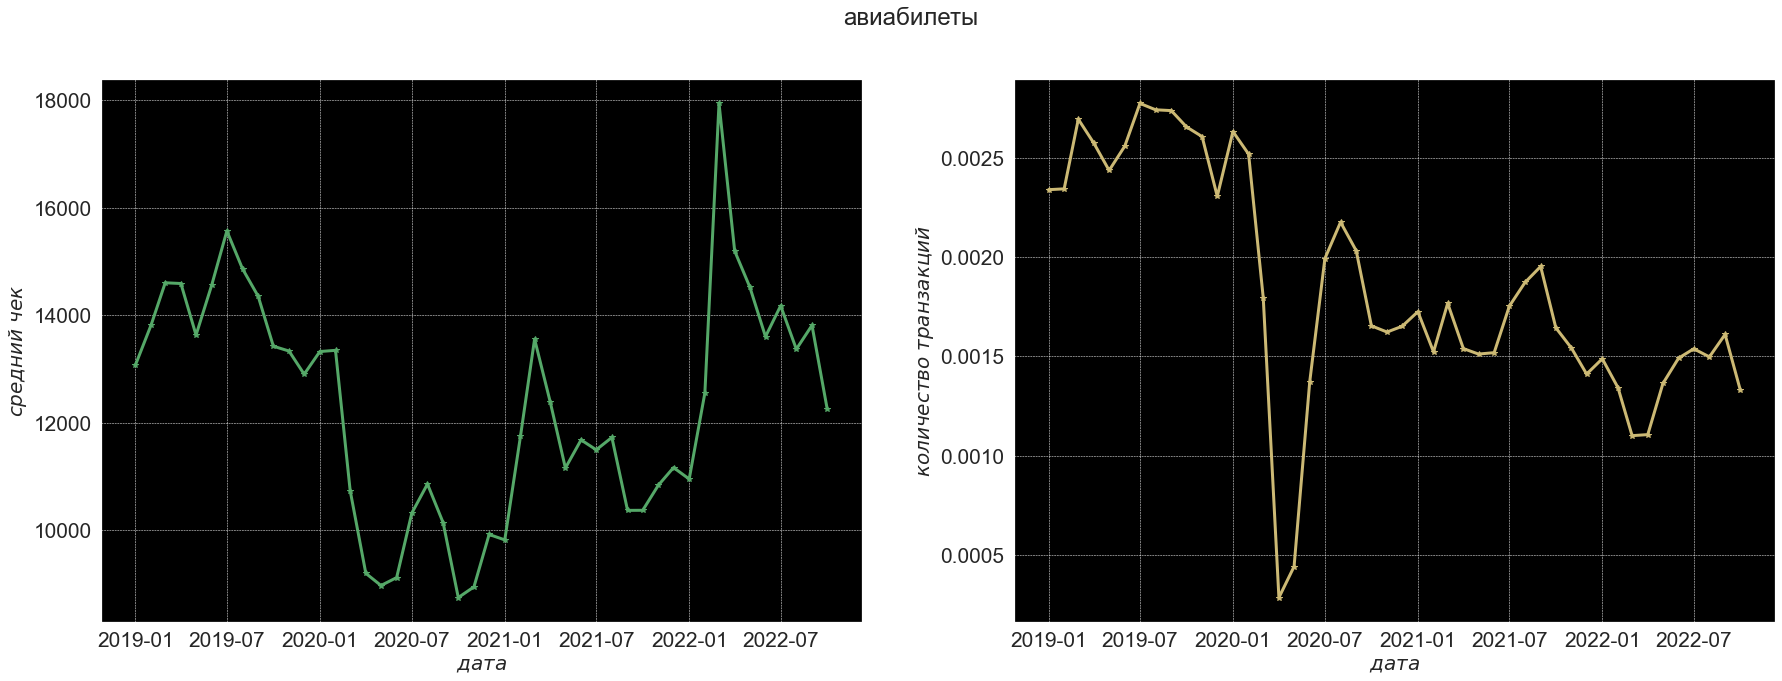

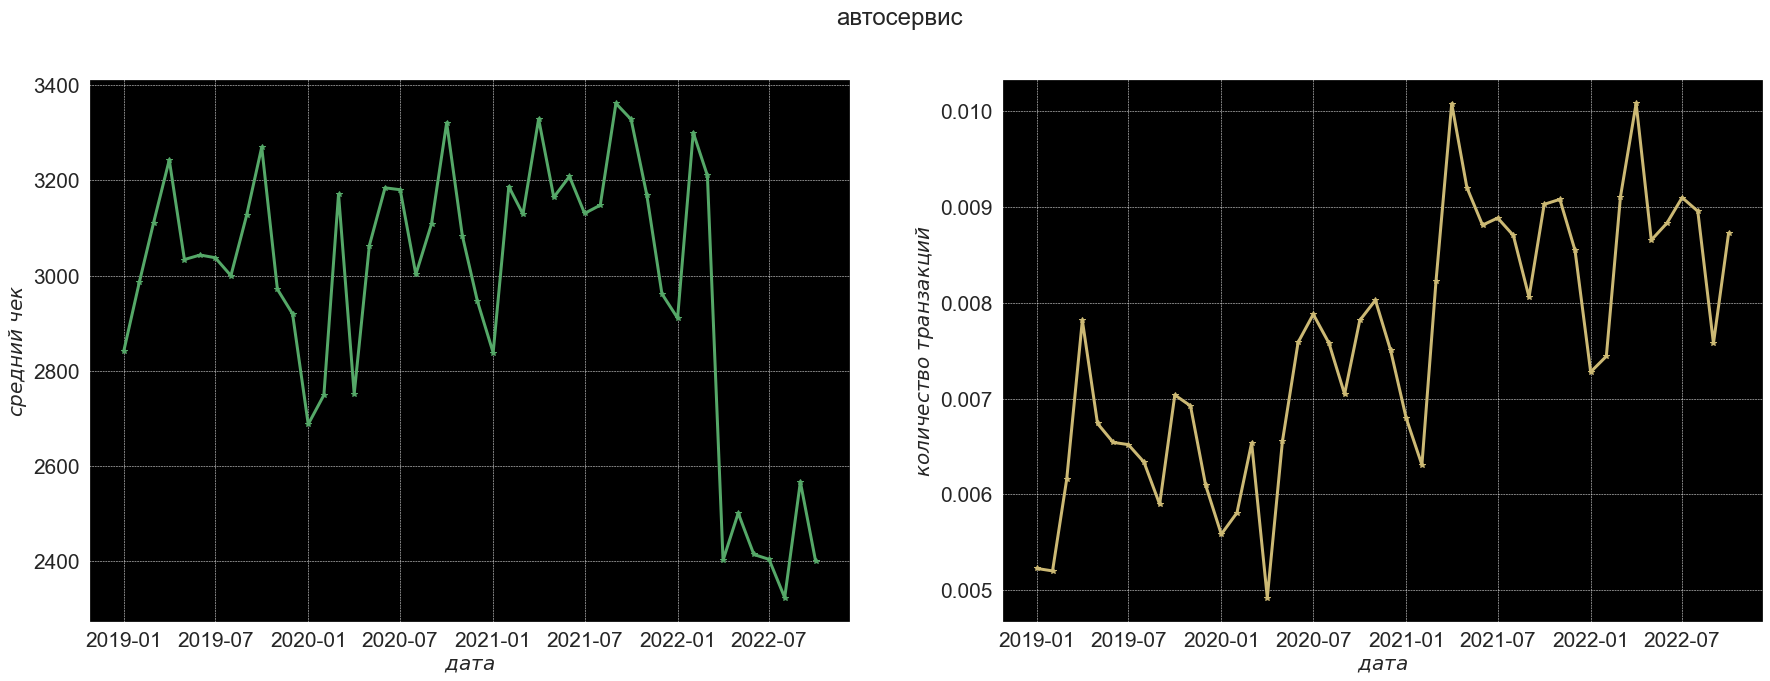

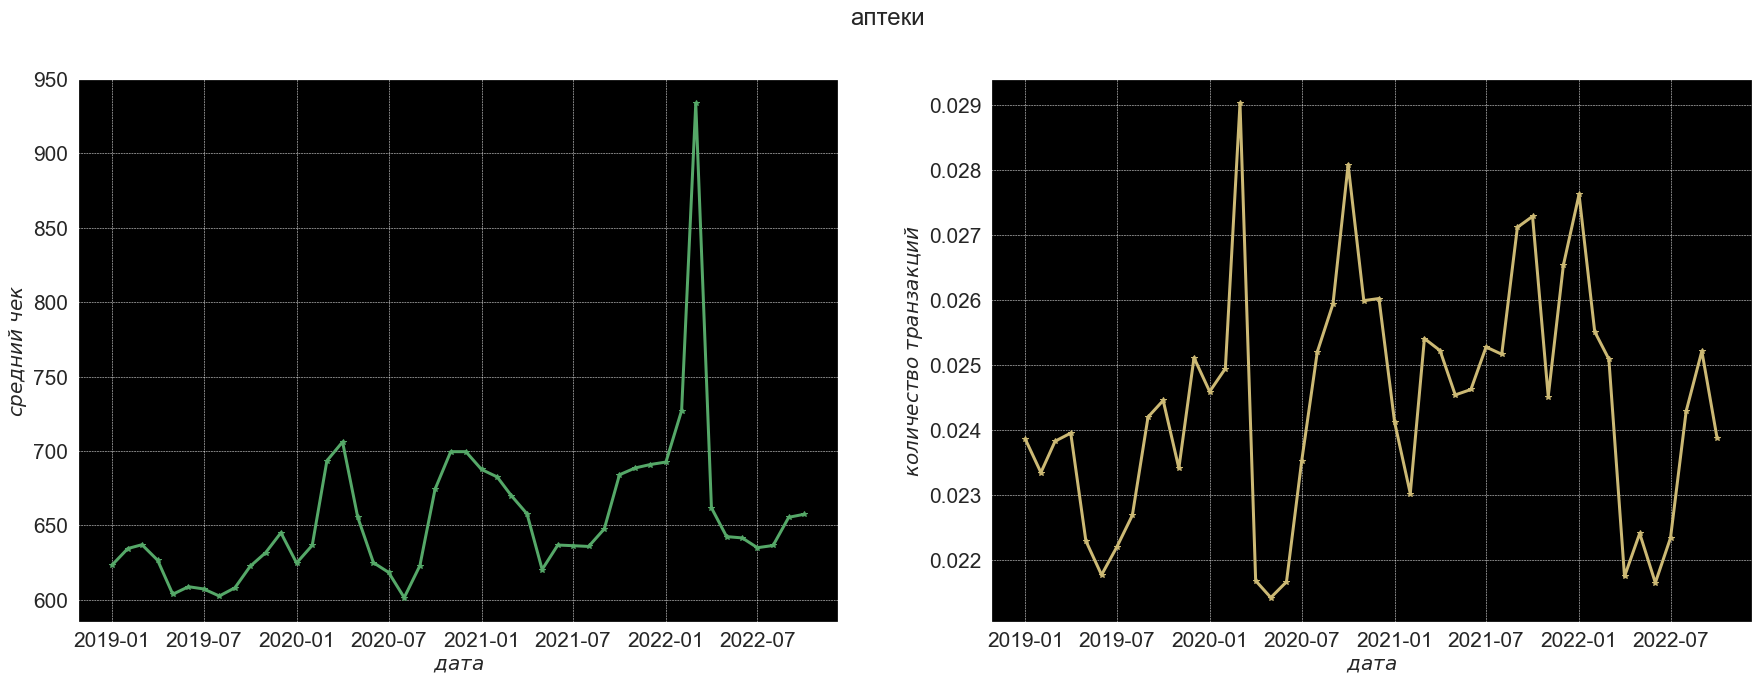

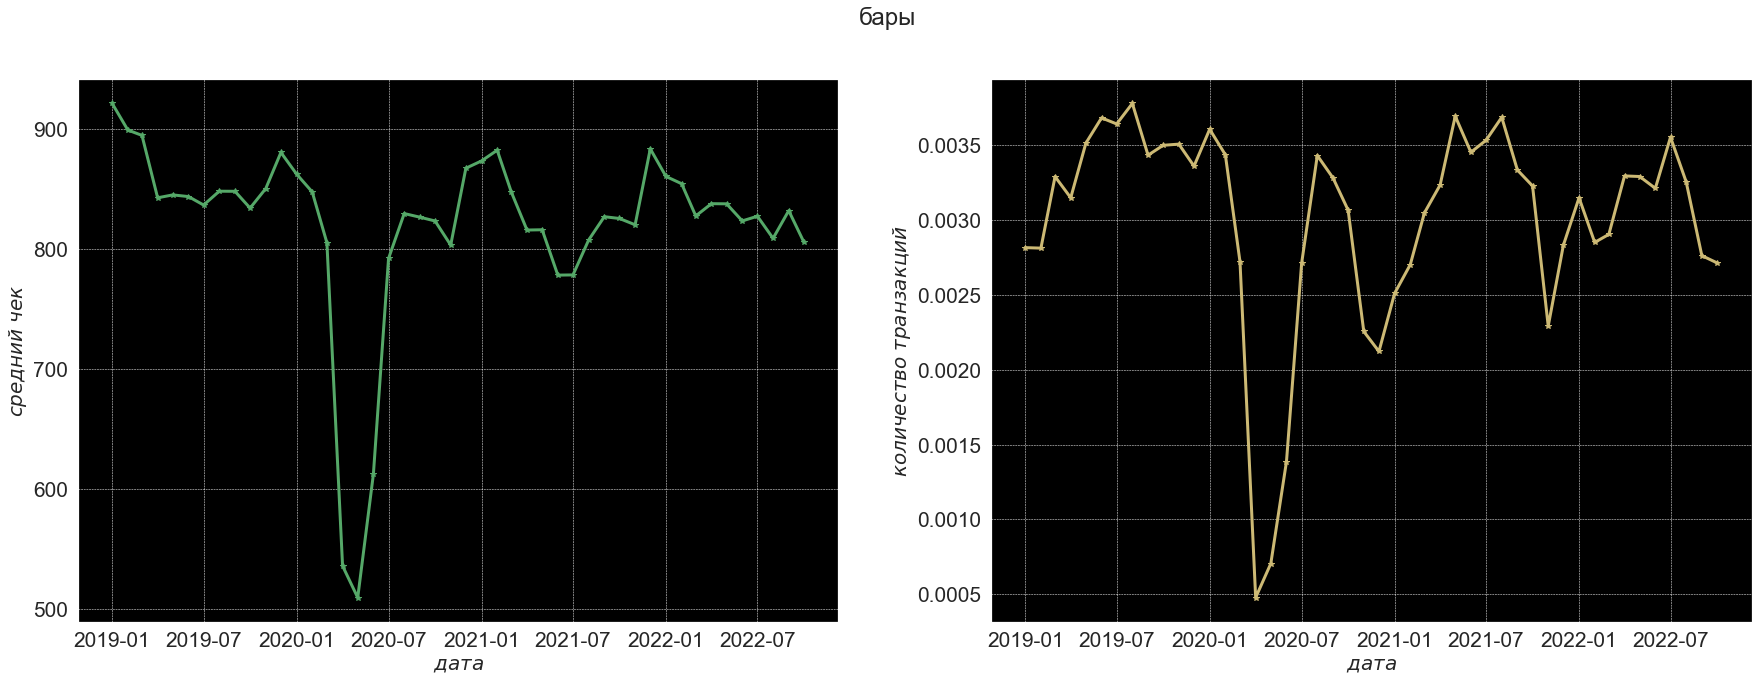

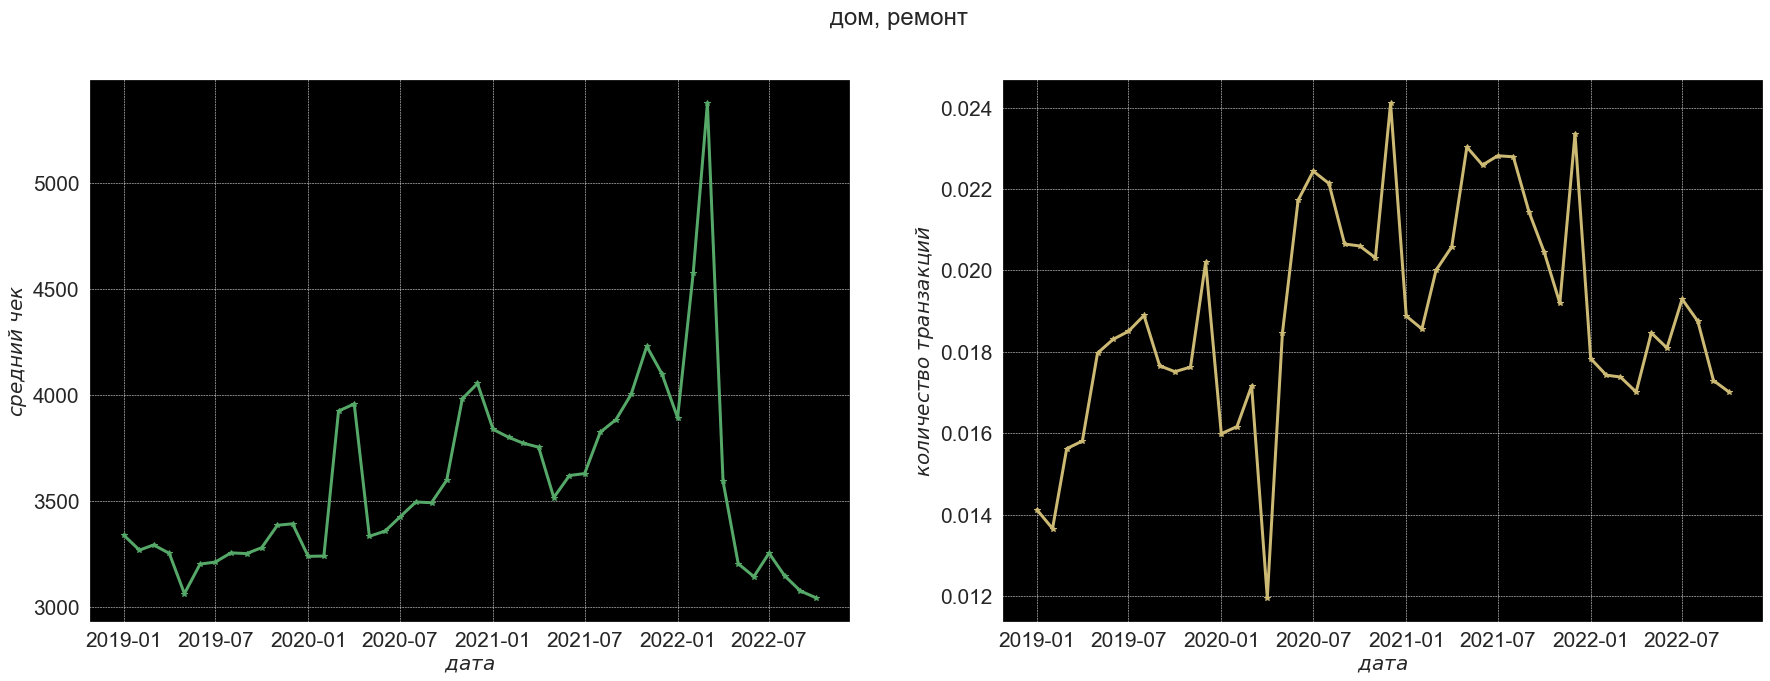

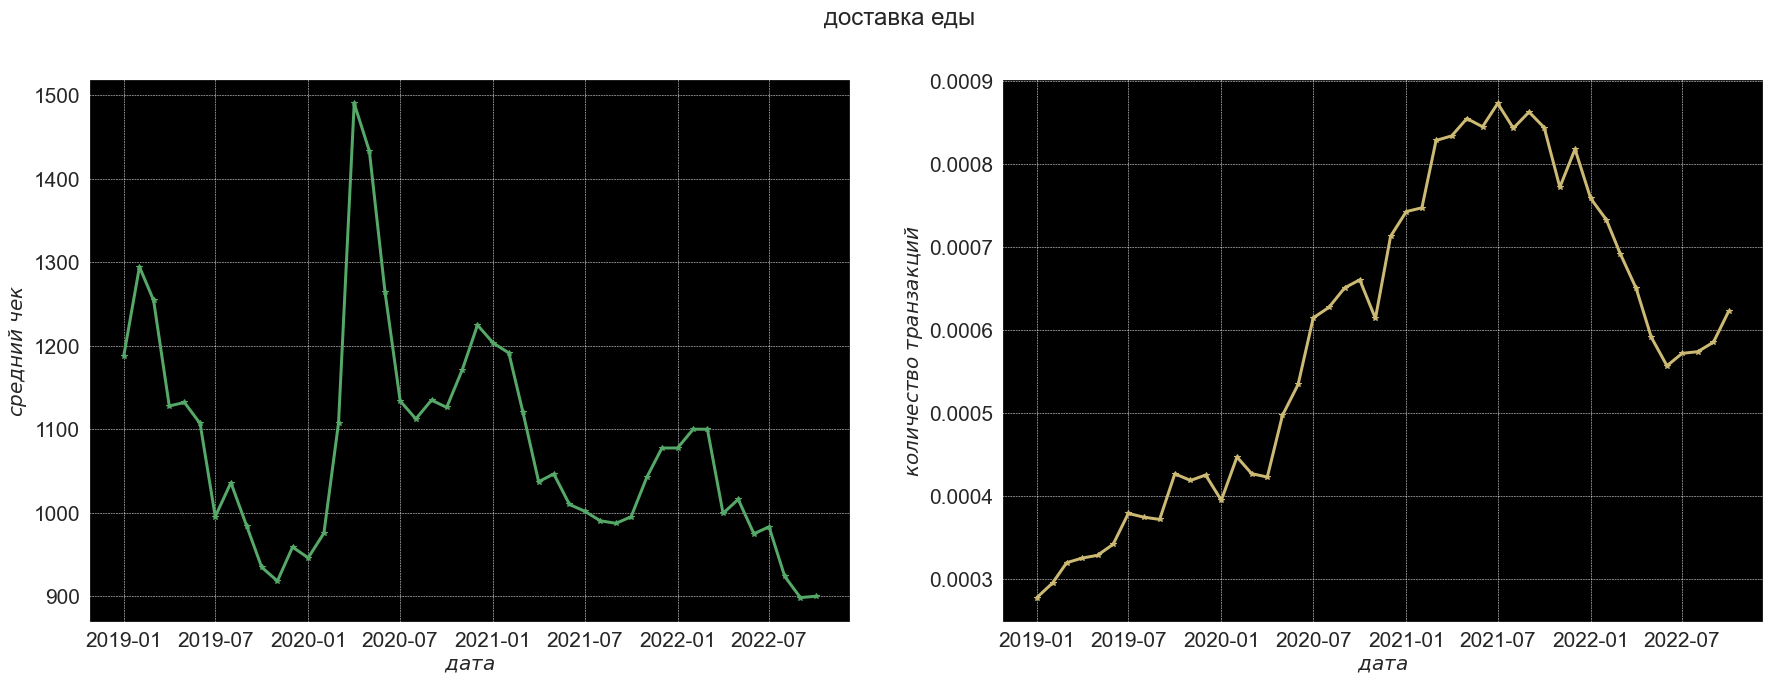

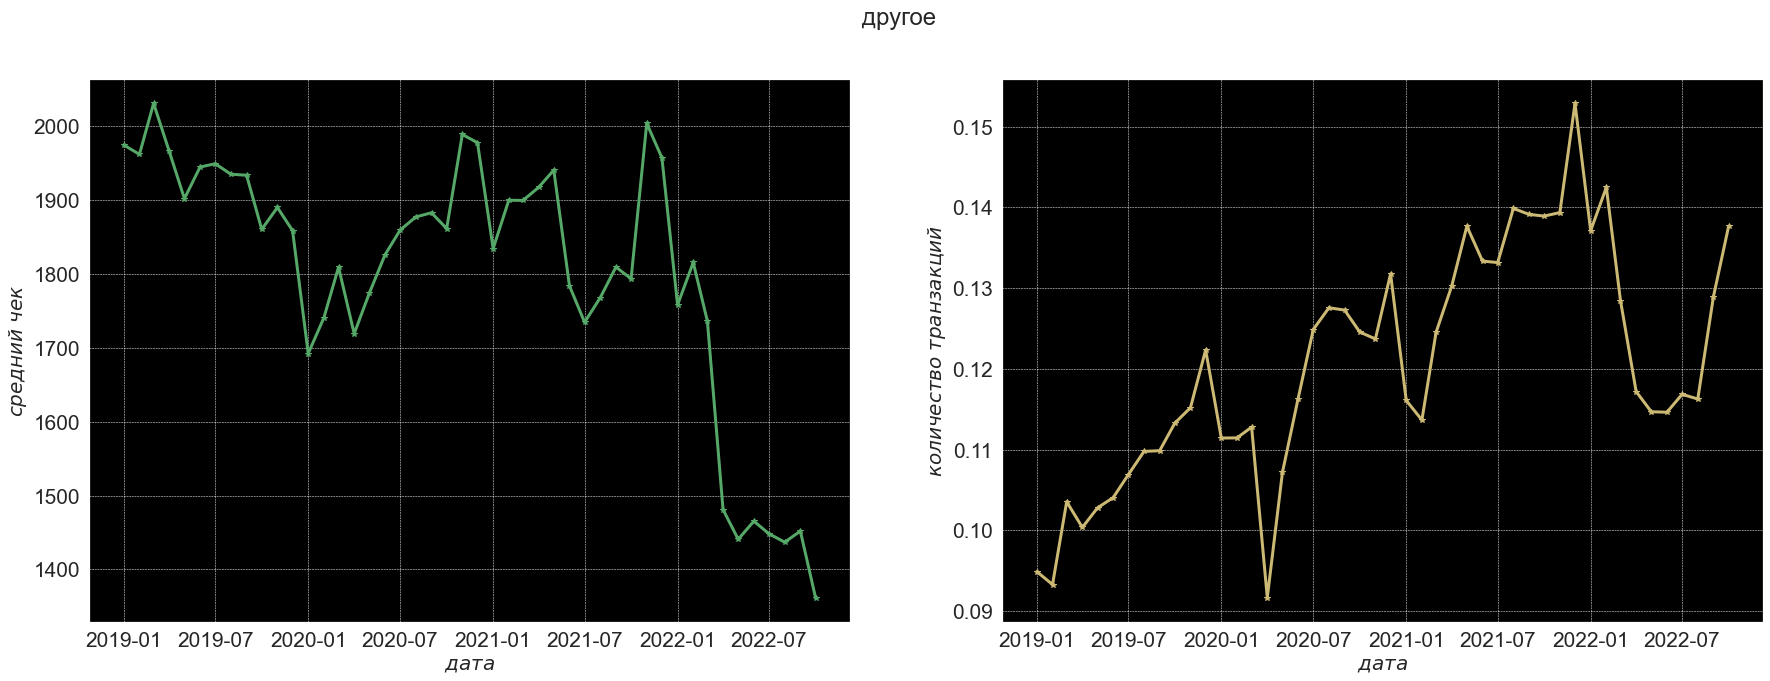

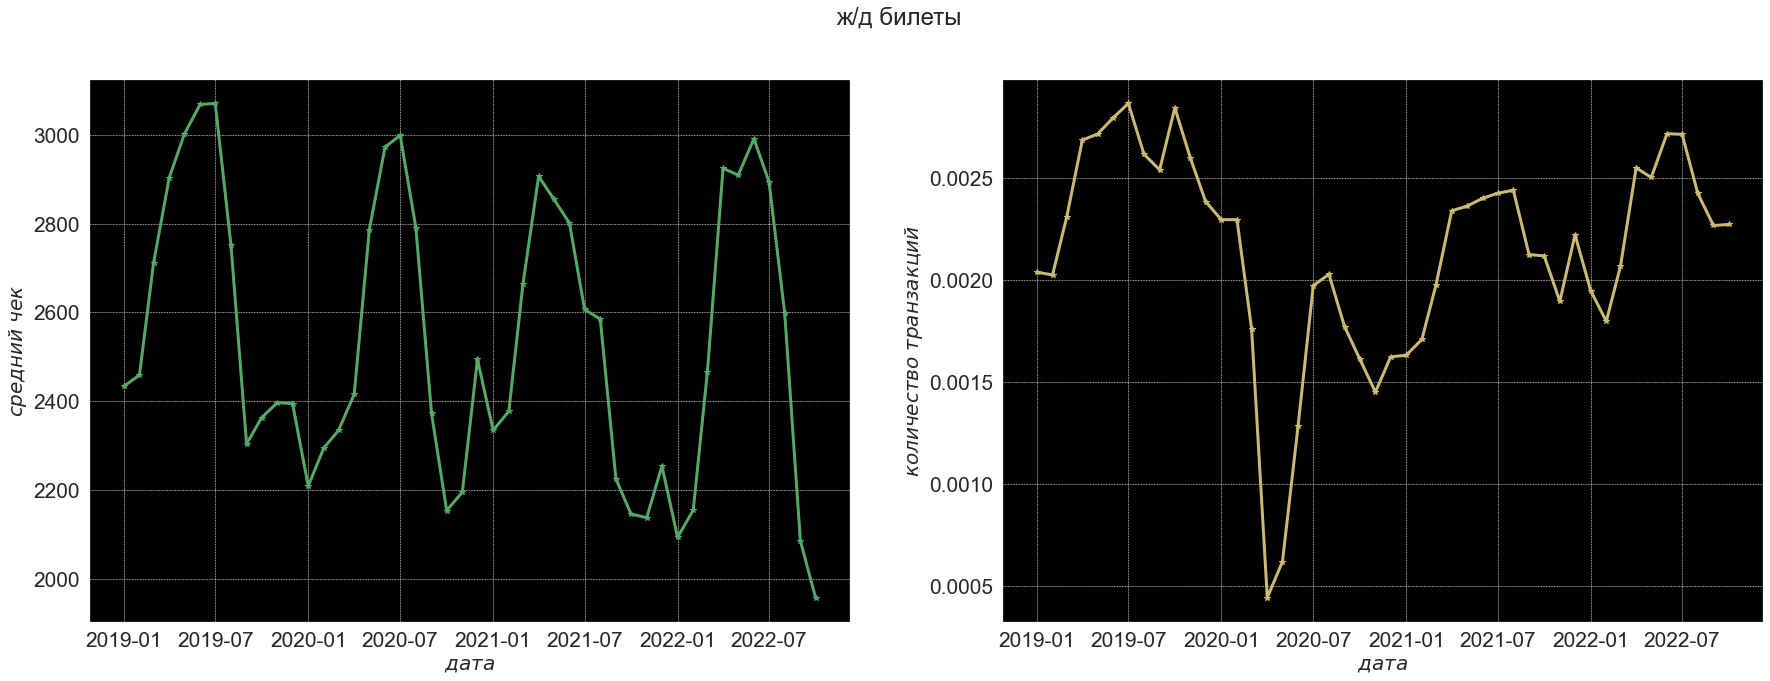

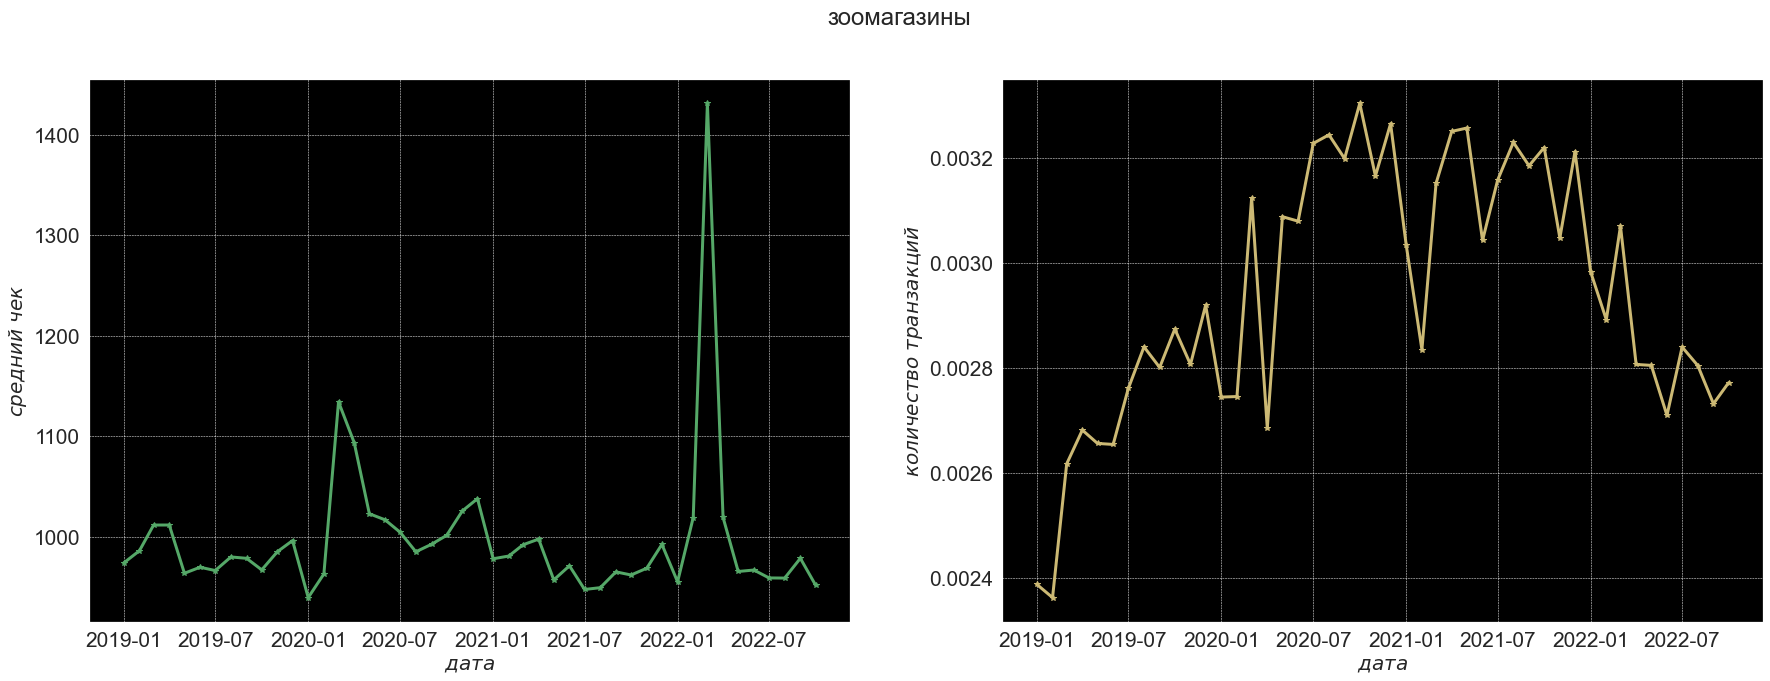

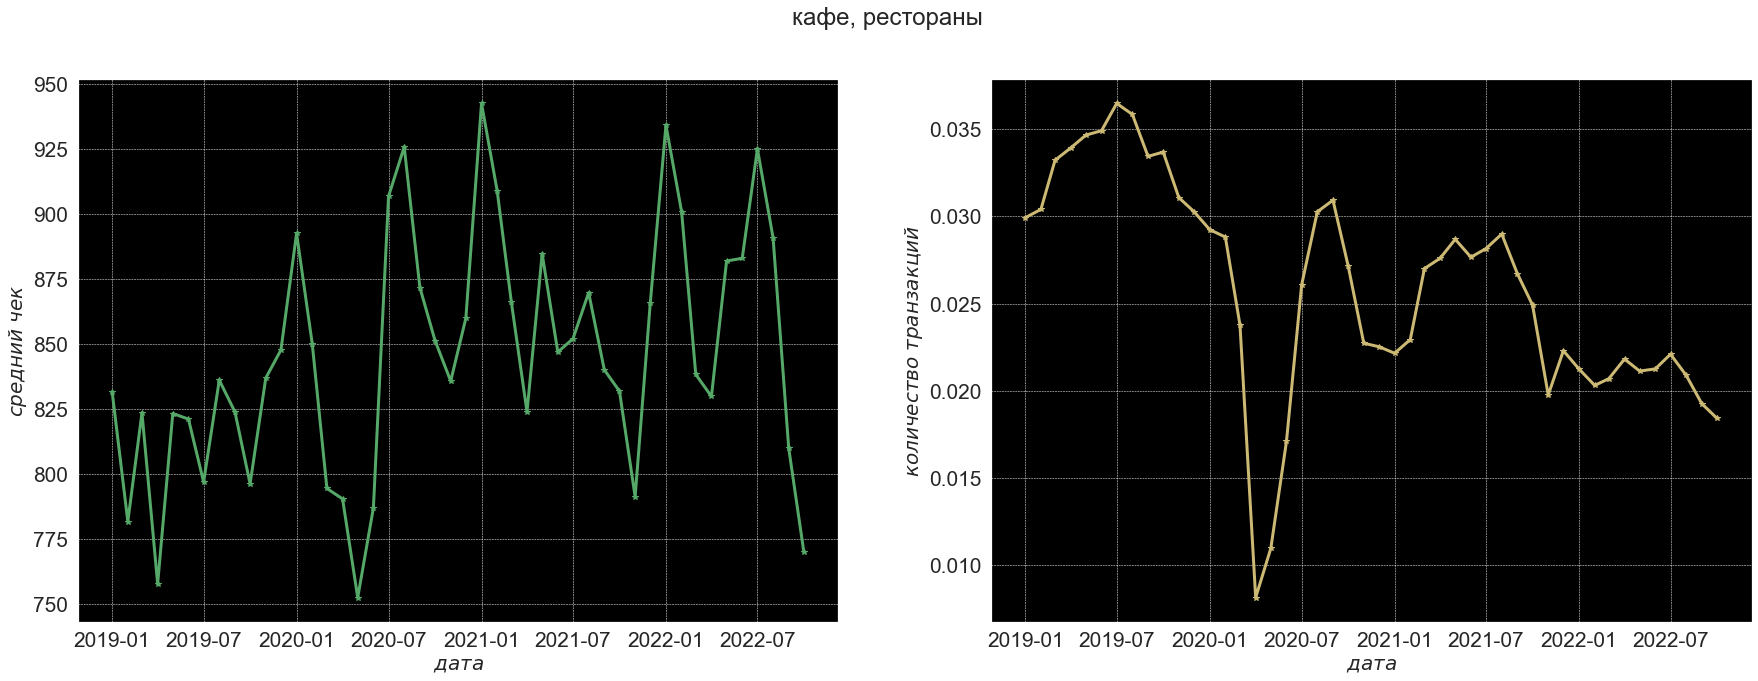

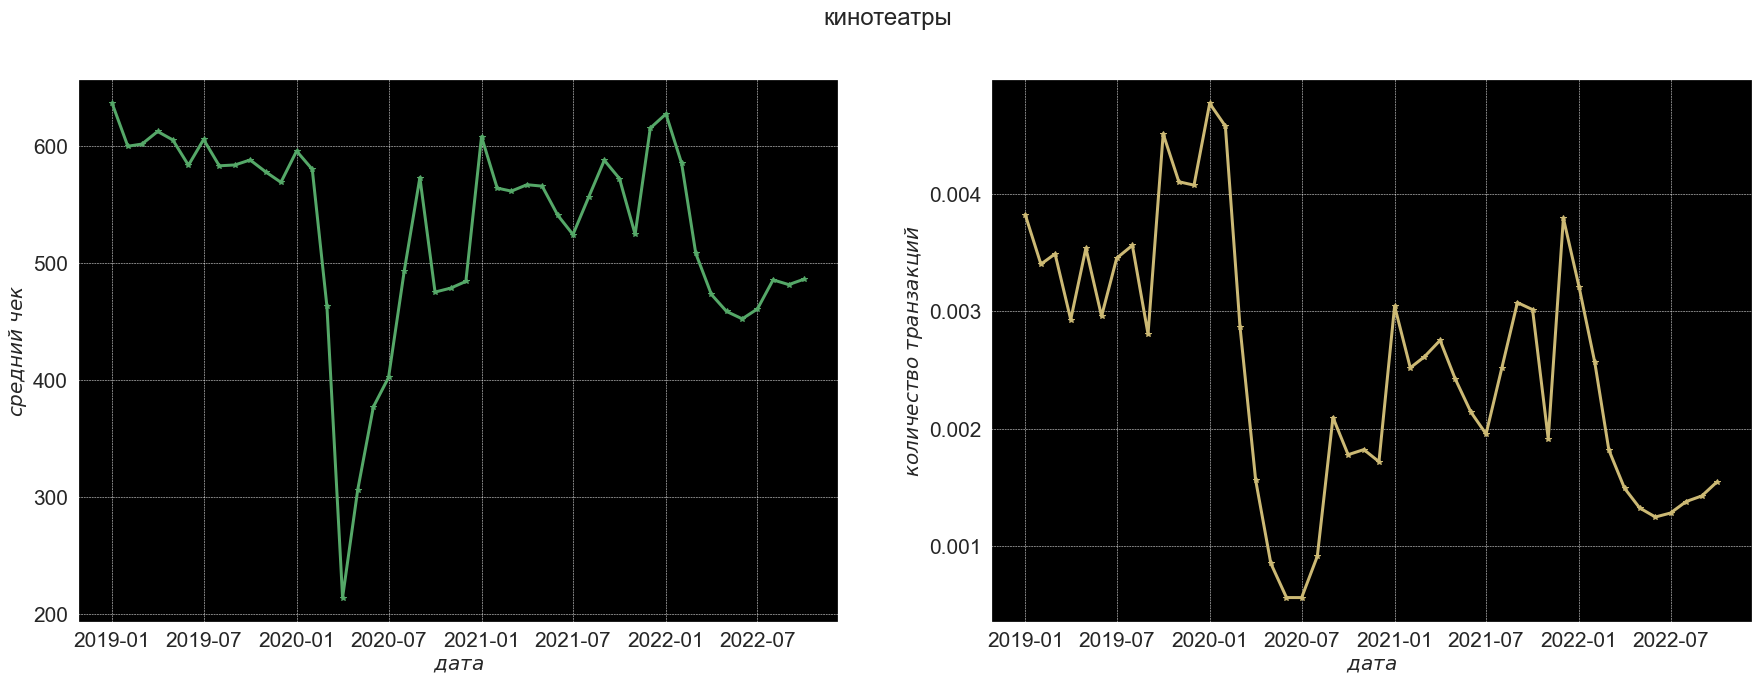

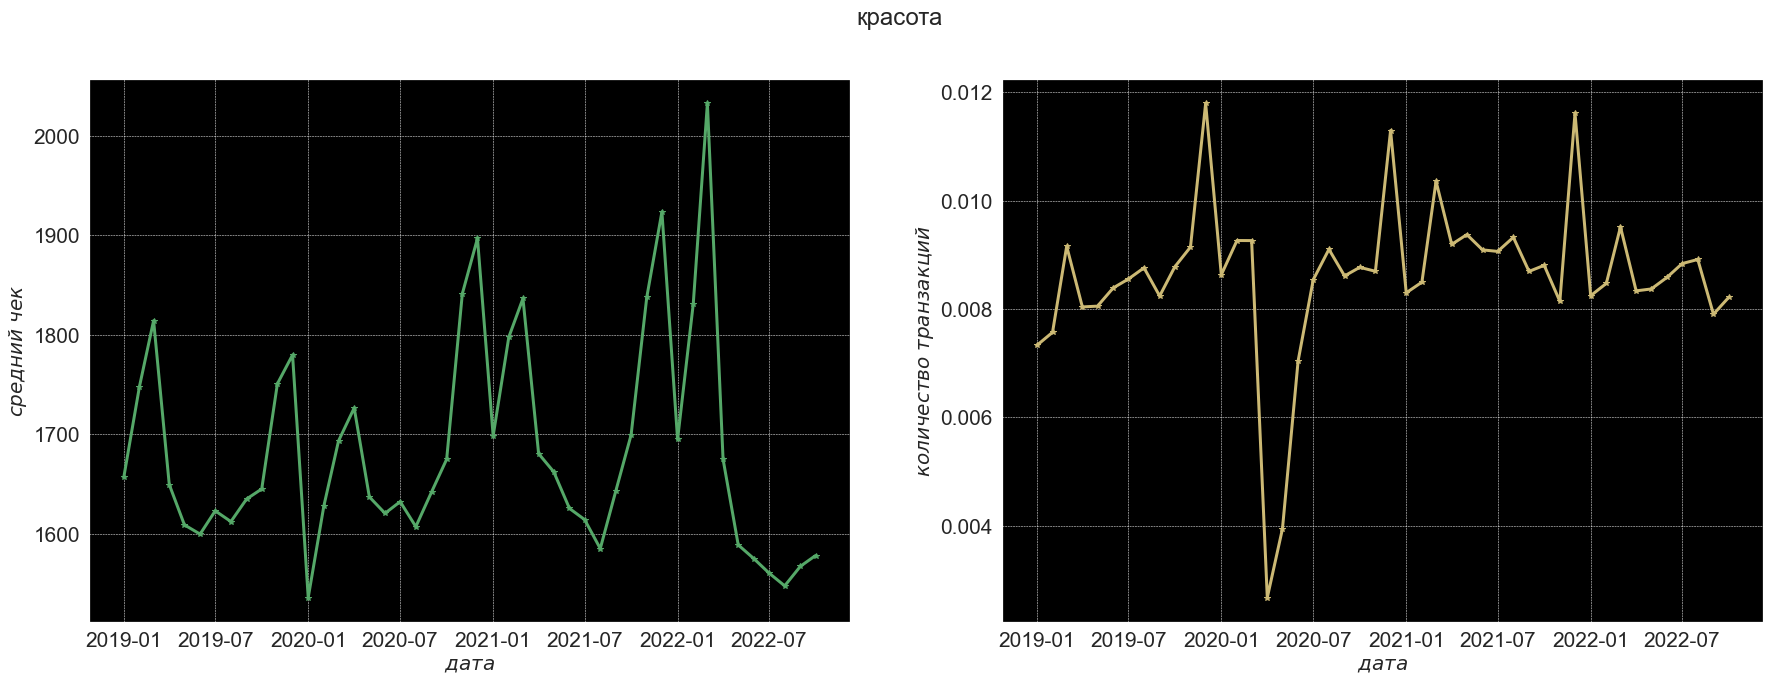

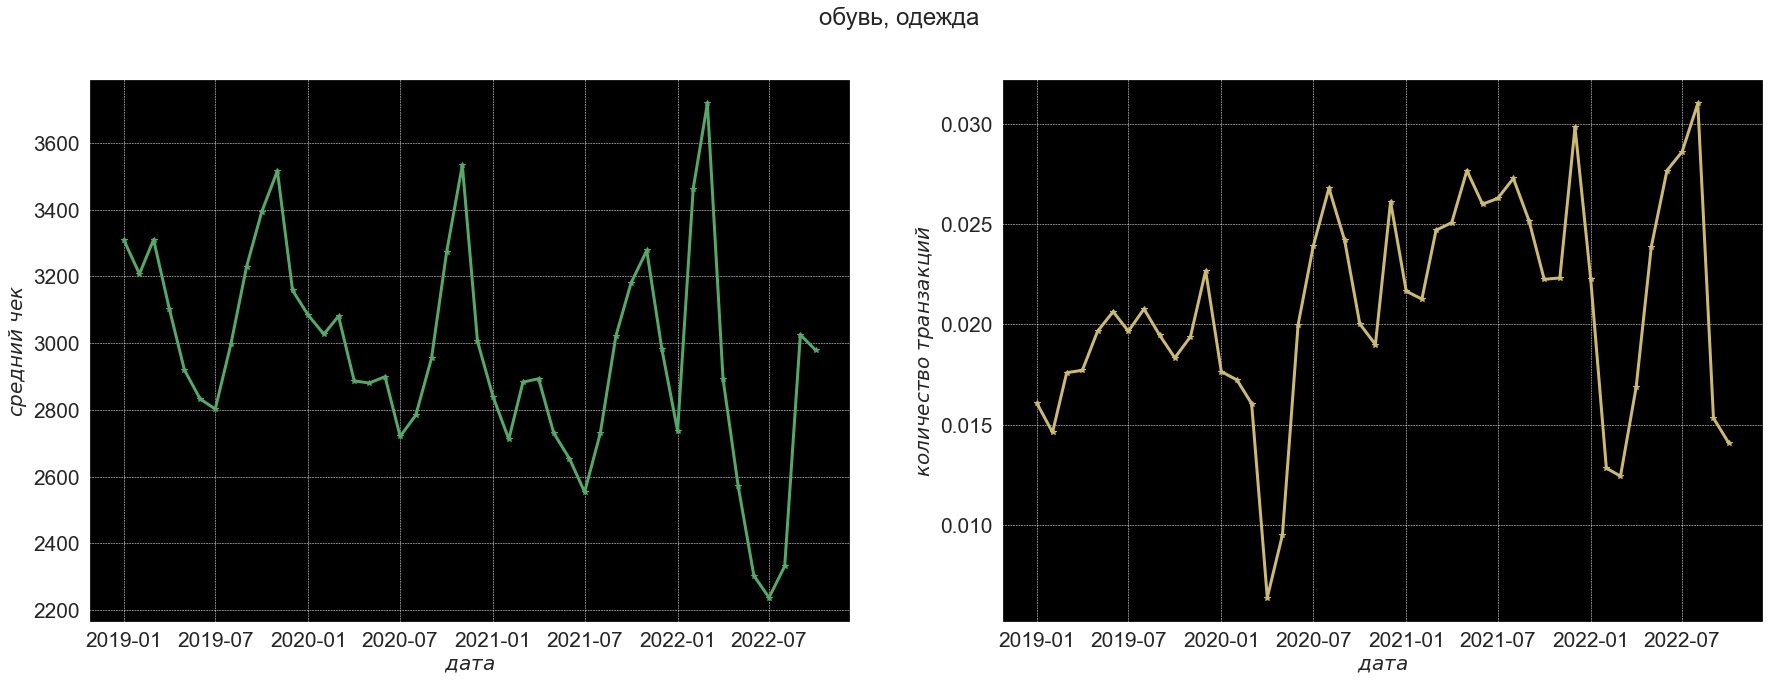

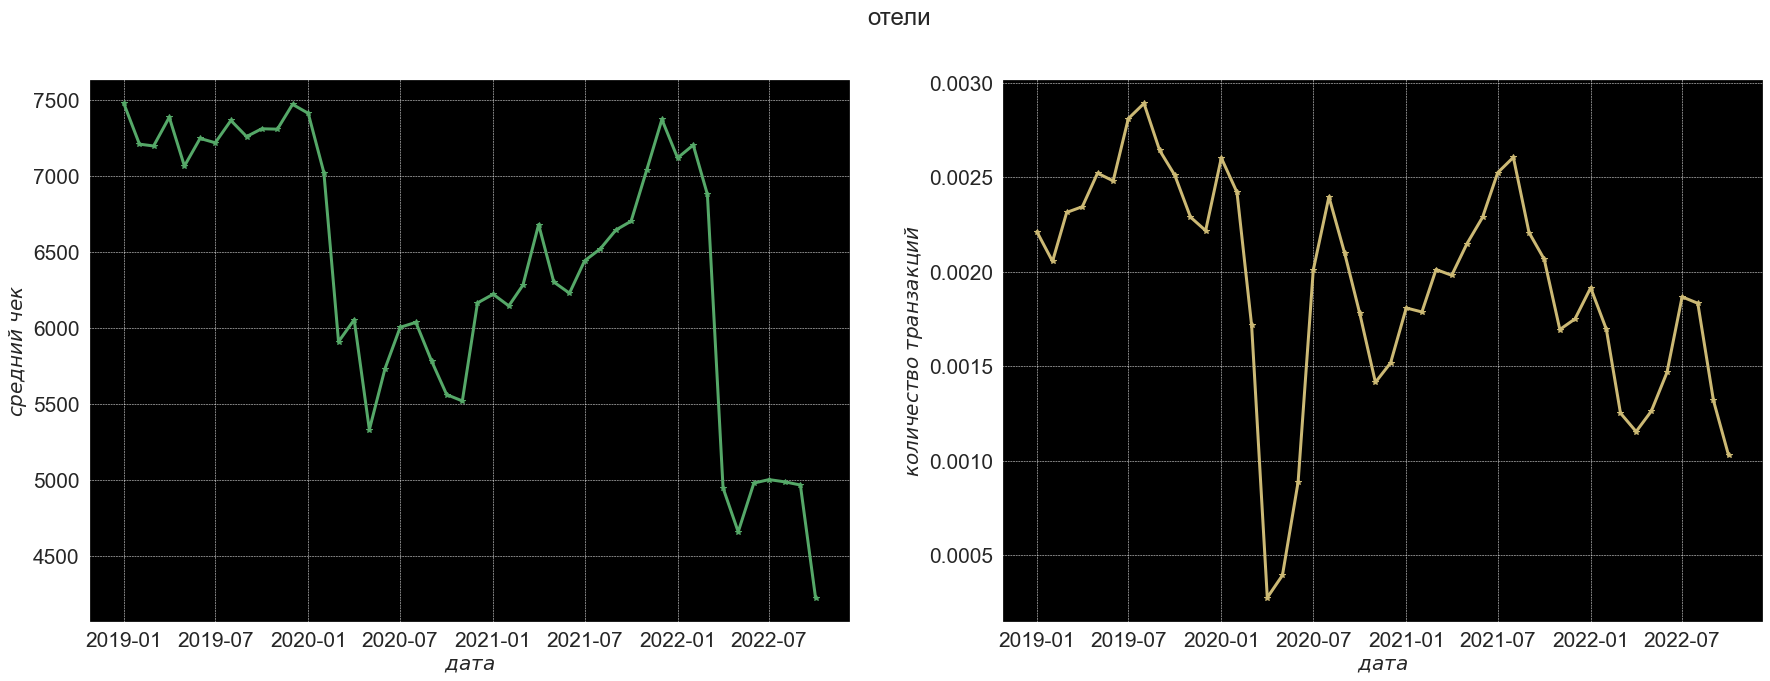

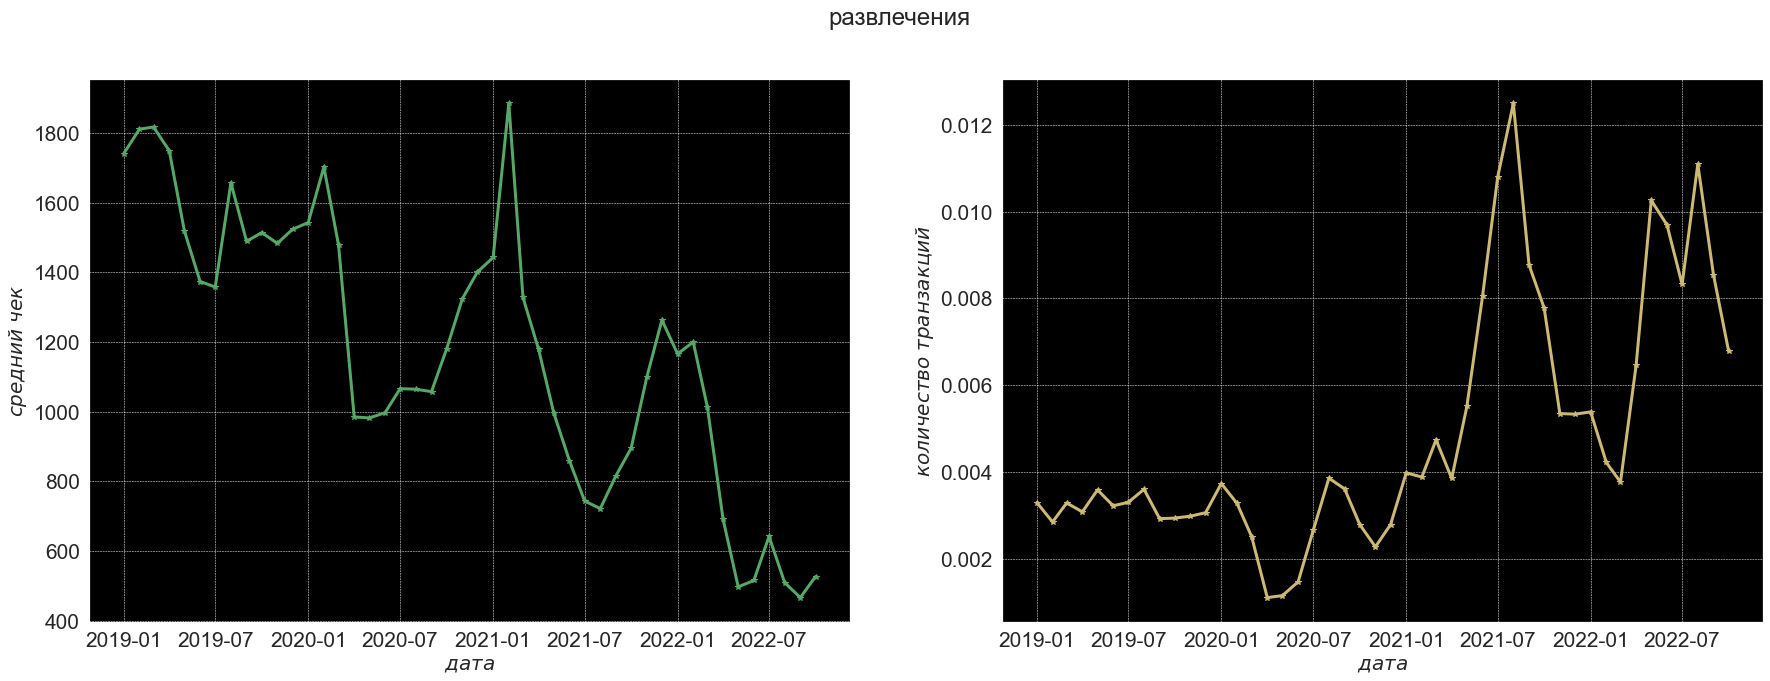

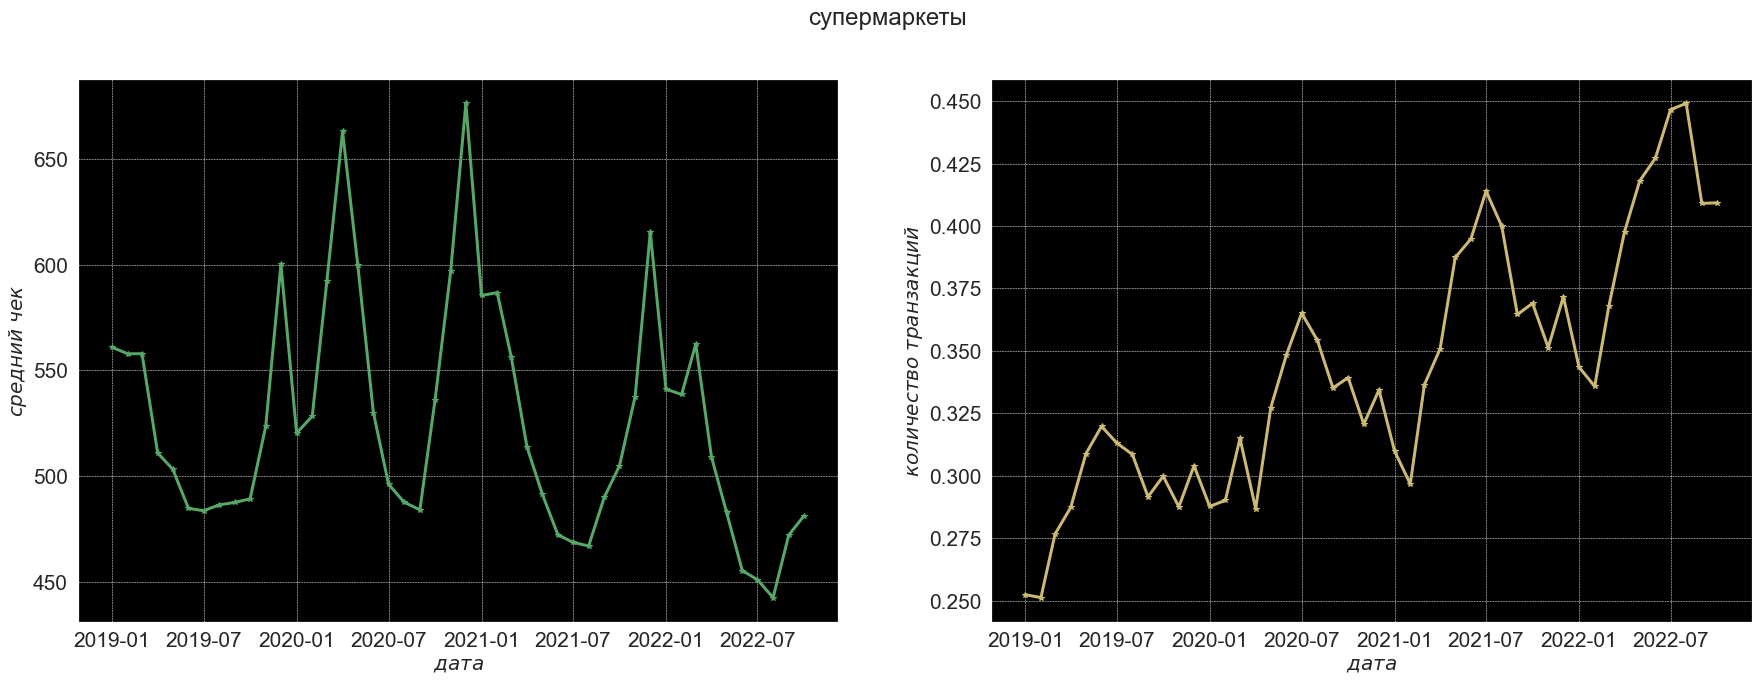

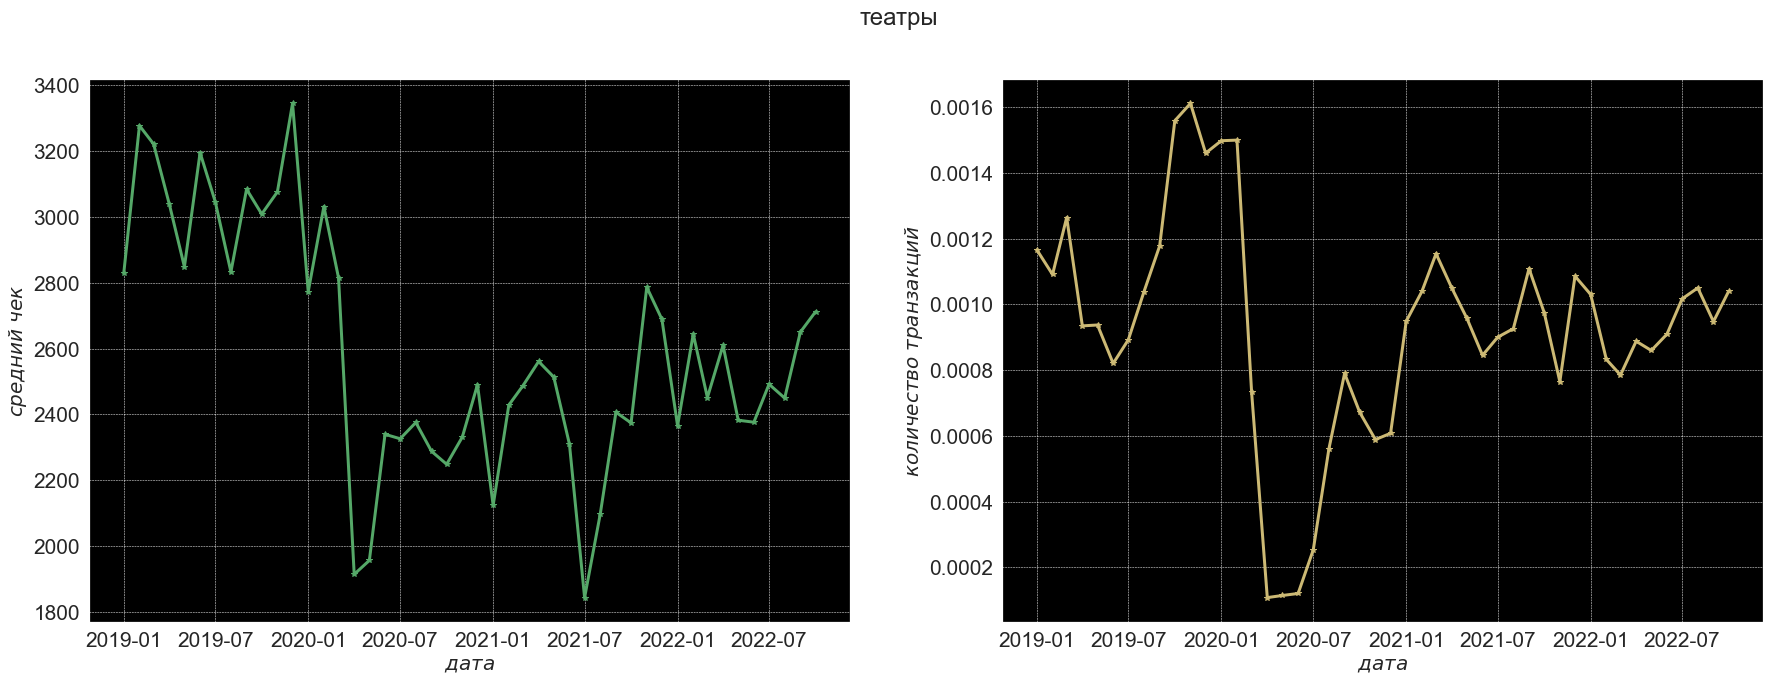

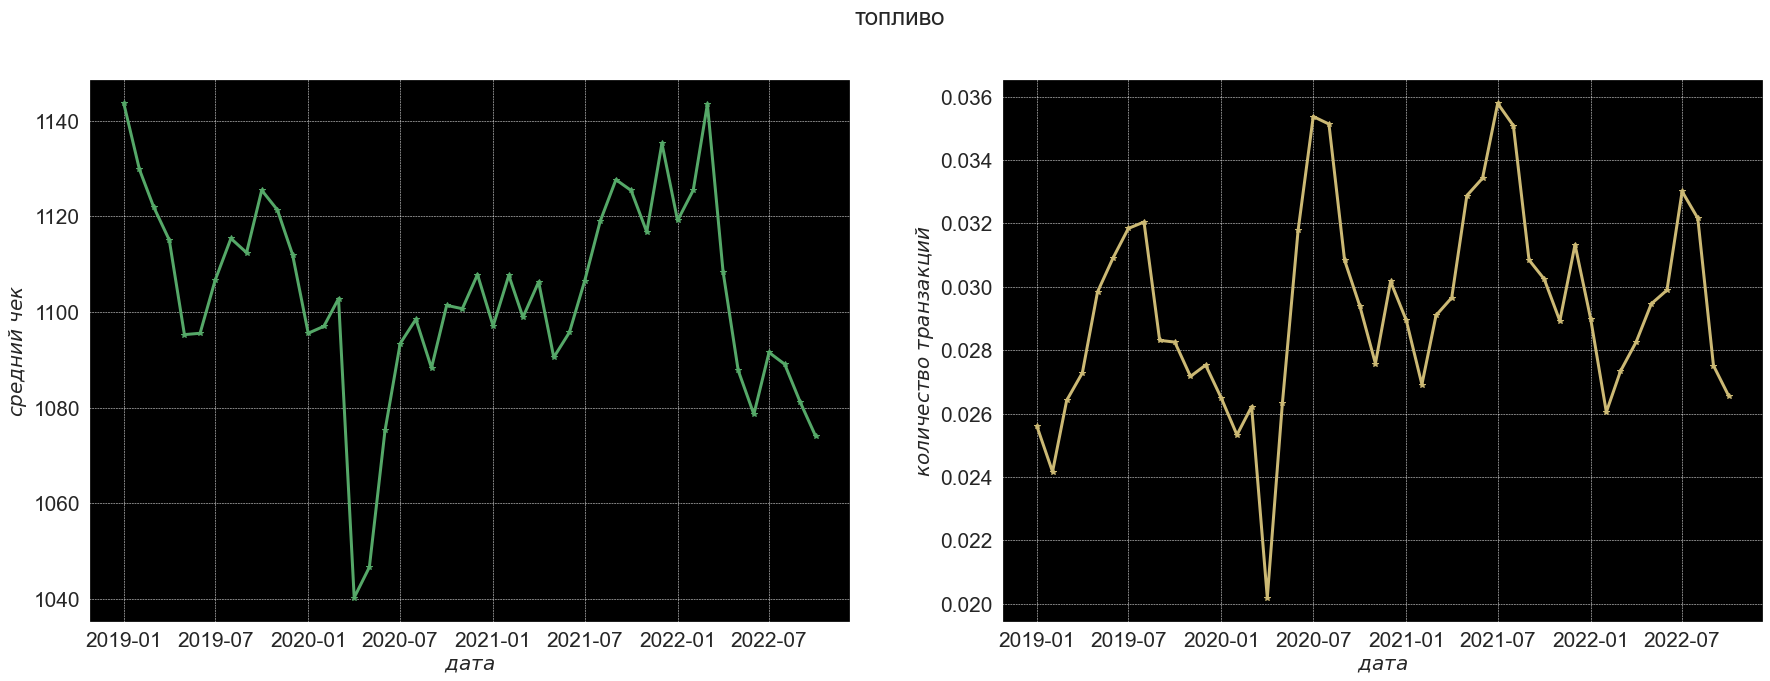

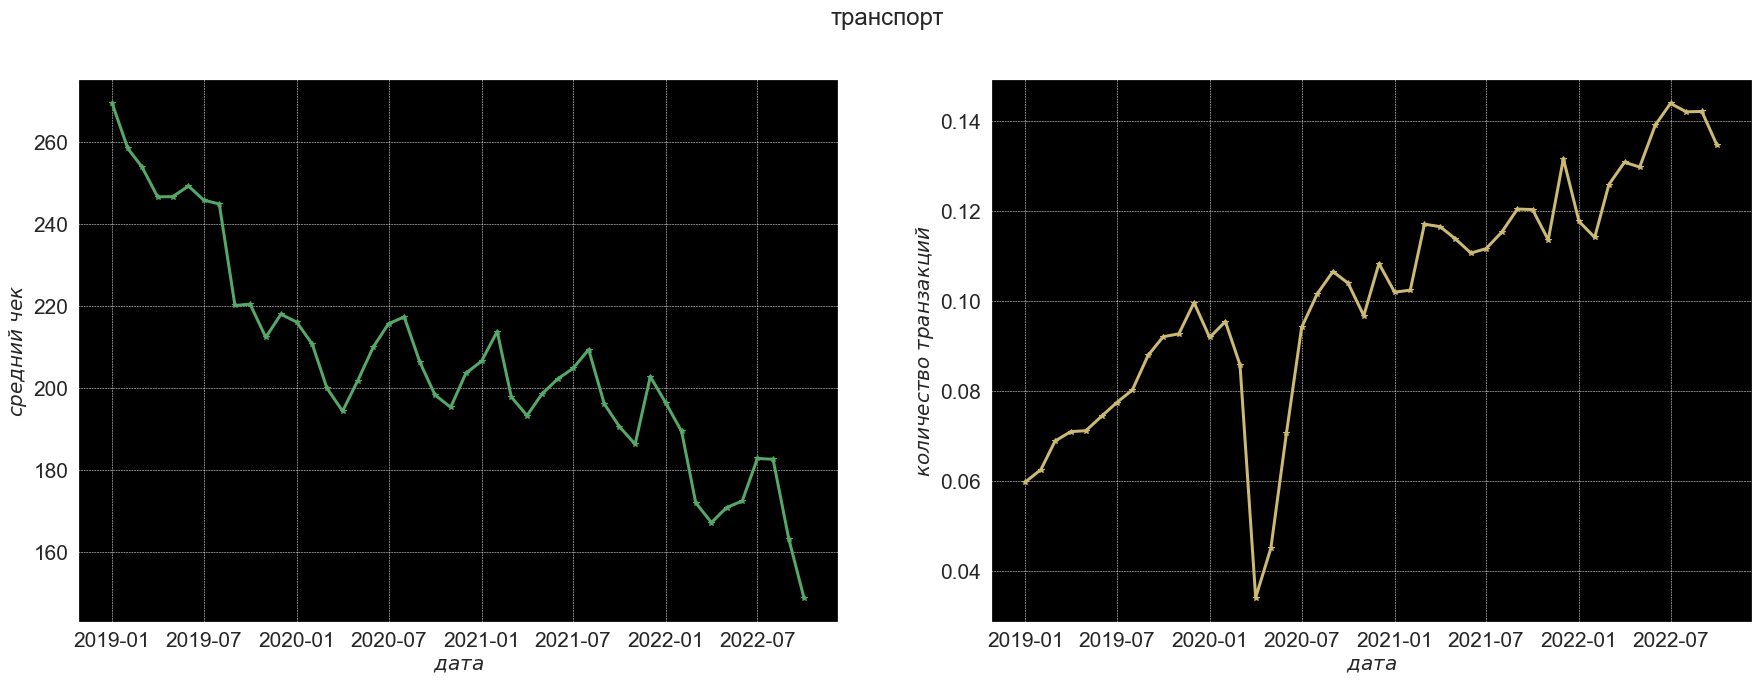

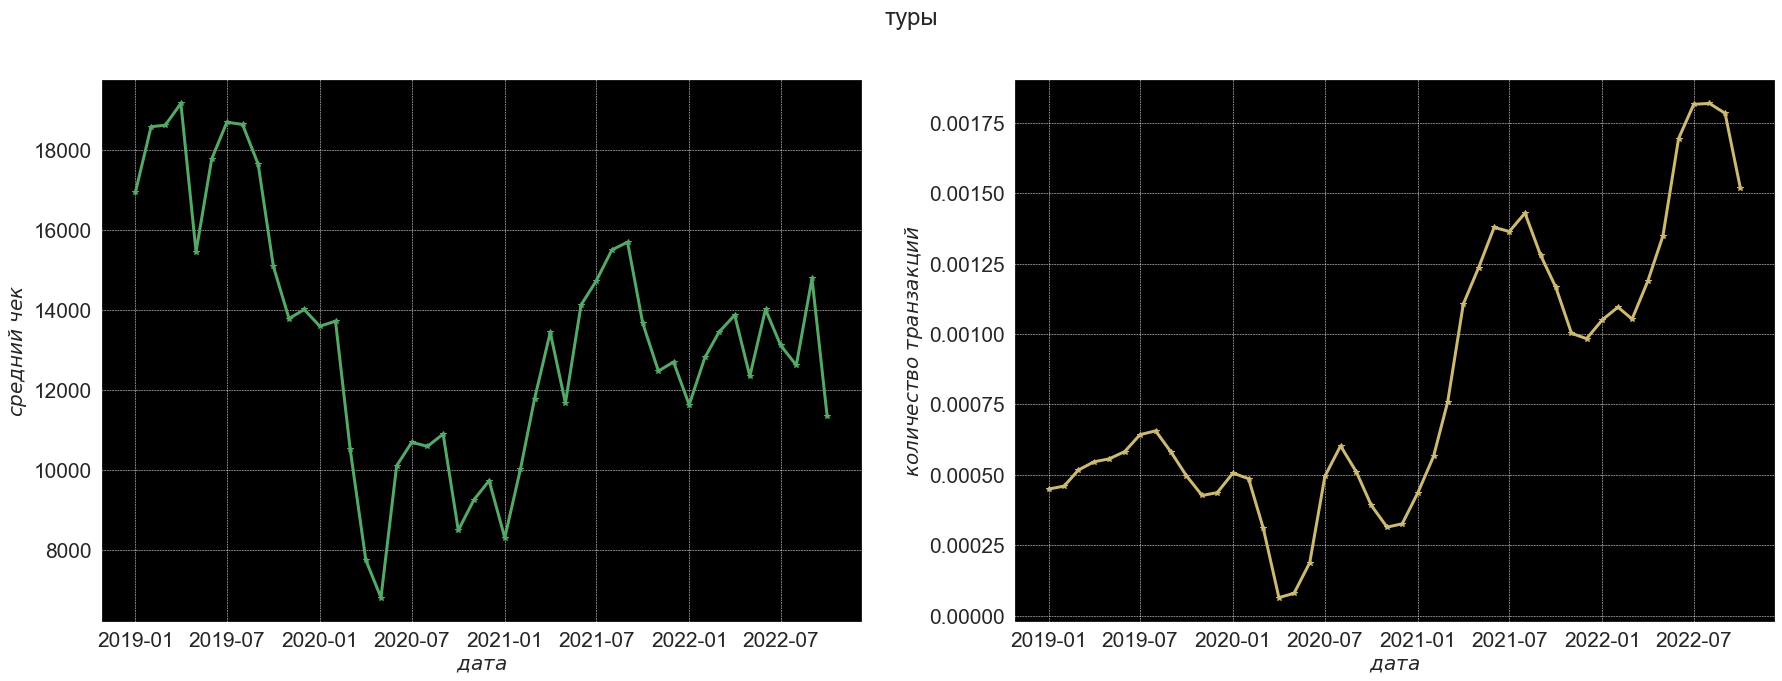

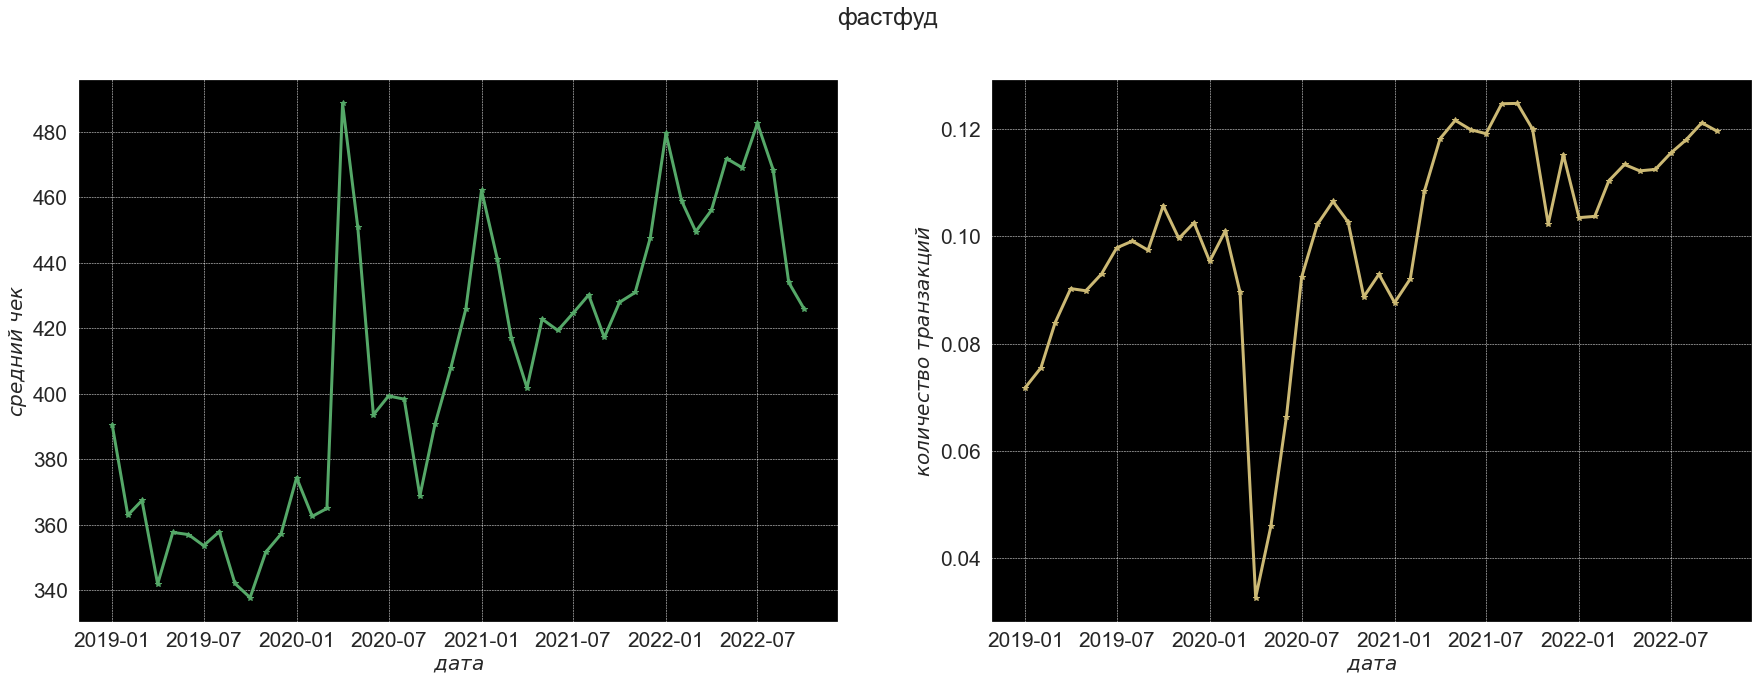

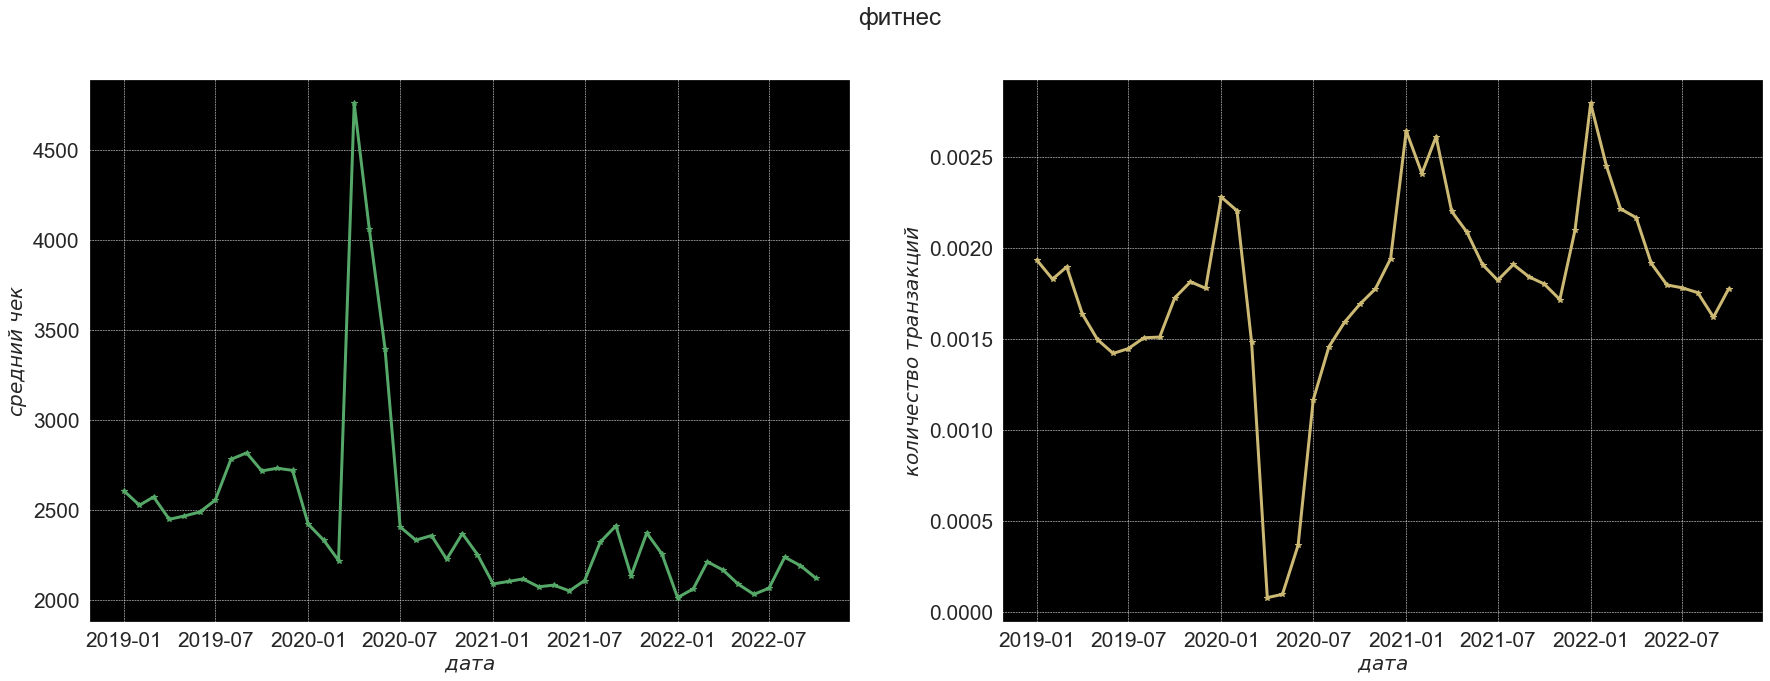

In [24]:
data_mc = month_mc 
data_tr = month_tr

categories = data_mc.columns.drop('дата')
date = 'дата' 
for category in categories:
    plt.rcParams['font.size'] = '20'
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(30, 10))

    fig.suptitle(category)

    ax1.plot(data_mc[date], data_mc[category], '-*', color='g', linewidth=3)
    ax1.set_xlabel('$дата$', fontsize=20)
    ax1.set_ylabel('$средний$ $чек$', fontsize=20)
    ax1.set(facecolor = "black")
    ax1.grid(color = 'white',linewidth = 0.5,linestyle = '--')

    
    ax2.plot(data_tr[date], data_tr[category],'-*', color='y', linewidth=3)
    ax2.set_xlabel('$дата$', fontsize=20)
    ax2.set_ylabel('$количество$ $транзакций$', fontsize=20)
    ax2.set(facecolor = "black")
    ax2.grid(color = 'white',linewidth = 0.5,linestyle = '--')

    
# plt.show()

### В ходе анализа графиков было сформулировано 4 гипотезы: 
1) Категория "Аптеки": в следствие ухода иностранных производителей лекараств, средний чек весной 2022 года увеличился.

2) Категория "Топливо": летом происходит большее количество транзакций, чем зимой. Летом люди заправляются чаще, чем зимой.

3) Категория "Супермаркеты": летом средний чек в супермаркетах меньше, чем в другие времена года. 

    3.1) При этом количество транзакций летом больше, чем в остальные времена года
    
4) Категория "Обувь, одежда": средний чек в сезоны осень-весна выше, чем лето-зима. 

## Гипотеза 1

$H_1$:  Категория "Аптеки": в следствие ухода иностранных производителей лекараств, средний чек весной 2022 года увеличился.

$H_0$: Средний чек остался прежним или уменьшился. 

In [25]:
data = day_mc
start = datetime(2022, 3, 1)
finish = datetime(2022, 6, 1)
date = datetime(2020, 1, 1) # не берем 2019 год, т.к. в этом году средний чек ниже, чем у остальных
spring = np.array(data.query('(дата < @finish) & (дата >= @start)')['аптеки'])
not_spring = np.array(data.query('~((дата < @finish) & (дата >= @start)) & (дата > @date) ')['аптеки'])

alpha = 0.01 
results = st.ttest_ind(spring, not_spring, equal_var=False)
p_value = results.pvalue
print('p_value:', p_value )
print('средний чек весной 2022 гола:', spring.mean())
print('средний чек в другой период:', not_spring.mean())
print()
if p_value < 2 * alpha and spring.mean() > not_spring.mean(): 
    print('Отвергаем нулевую гипотезу. Средний чек весной 2022 года выше.')
else: 
    print('Не можем отвергнуть нулевую гипотезу. ')

p_value: 1.9298977934897175e-06
средний чек весной 2022 гола: 741.8964623256713
средний чек в другой период: 657.7786365212097

Отвергаем нулевую гипотезу. Средний чек весной 2022 года выше.


## Гипотеза 2 

$H_1$: Категория "Топливо": летом происходит большее количество транзакций, чем зимой. Летом люди заправляются чаще, чем зимой.

$H_0$: Летом люди заправляются не чаще, чем зимой.




In [26]:
data = day_tr
winter_month = [12, 1, 2]
summer_month = [6, 7, 8]
# pd.DatetimeIndex(data['дата']).month
rows_winter = [entry in winter_month for entry in pd.DatetimeIndex(data['дата']).month]
rows_summer = [entry in summer_month for entry in pd.DatetimeIndex(data['дата']).month]
winter = np.array(data.loc[rows_winter, 'топливо'])
summer = np.array(data.loc[rows_summer, 'топливо'])

results = st.ttest_ind(winter, summer, equal_var=False)
p_value = results.pvalue
alpha = 0.01

print('p_value:', p_value )
print('среднее количество транзакций летом:', summer.mean().round(5))
print('среднее количество транзакций зимой:', winter.mean().round(5))
print()
if p_value < 2 * alpha and winter.mean() < summer.mean(): 
    print('Отвергаем нулевую гипотезу. Количество транзакций летом превышает количество транзакций зимой.')
else: 
    print('Не можем отвергнуть нулевую гипотезу.')
# data.loc[]

p_value: 7.895229880559145e-90
среднее количество транзакций летом: 0.02772
среднее количество транзакций зимой: 0.02351

Отвергаем нулевую гипотезу. Количество транзакций летом превышает количество транзакций зимой.


## Гипотеза 3

$H_1$: Категория "Супермаркеты": летом средний чек в супермаркетах меньше, чем в другие времена года.

$H_0$: Летом средний чек не ниже среднего чека в другие времена года.

In [27]:
data = day_mc
rows_summer = [entry in summer_month for entry in pd.DatetimeIndex(data['дата']).month]
rows_not_summer = [entry not in summer_month for entry in pd.DatetimeIndex(data['дата']).month]
summer = np.array(data.loc[rows_summer, 'супермаркеты'])
not_summer = np.array(data.loc[rows_not_summer, 'супермаркеты'])

results = st.ttest_ind(summer, not_summer, equal_var=False)
p_value = results.pvalue
alpha = 0.01
print('p_value:', p_value )
print('средний чек летом:', summer.mean().round(1))
print('средний чек в другое время года:', not_summer.mean().round(1))
print()
if p_value < 2 * alpha and not_summer.mean() > summer.mean(): 
    print('Отвергаем нулевую гипотезу. Средний чек летом меньше, чем в другое время года.')
else: 
    print('Не можем отвергнуть нулевую гипотезу.')

p_value: 6.289189245453203e-76
средний чек летом: 476.5
средний чек в другое время года: 541.2

Отвергаем нулевую гипотезу. Средний чек летом меньше, чем в другое время года.


#### Гипотеза 3.1

$H_1$: Категория "Супермаркеты": летом количество транзакций в супермаркетах выше, чем в другие времена года.

$H_0$: Количество транзакций летом не превышает количества транзакций в другие времена года.

In [28]:
data = day_tr
rows_summer = [entry in summer_month for entry in pd.DatetimeIndex(data['дата']).month]
rows_not_summer = [entry not in summer_month for entry in pd.DatetimeIndex(data['дата']).month]
summer = np.array(data.loc[rows_summer, 'супермаркеты'])
not_summer = np.array(data.loc[rows_not_summer, 'супермаркеты'])

results = st.ttest_ind(summer, not_summer, equal_var=False)
p_value = results.pvalue
alpha = 0.01
print('p_value:', p_value )
print('количество транзакций летом:', summer.mean().round(4))
print('количество транзакций в другое время года:', not_summer.mean().round(4))
print()
if p_value < 2 * alpha and not_summer.mean() < summer.mean(): 
    print('Отвергаем нулевую гипотезу. Количество транзакций летом выше, чем в другое время года')
else: 
    print('Не можем отвергнуть нулевую гипотезу.')

p_value: 1.6115083582444548e-42
количество транзакций летом: 0.3176
количество транзакций в другое время года: 0.2796

Отвергаем нулевую гипотезу. Количество транзакций летом выше, чем в другое время года


## Гипотеза 4

$H_1$: Категория "Обувь, одежда": средний чек в сезоны осень-весна выше, чем лето-зима.

$H_0$: Средний чек осенью и весной не выше, чем летом и зимой

In [29]:
data = day_mc
summer_winter = [6, 7, 8, 12, 1, 2]
spring_autum = [9, 10, 11, 3, 4, 5]
rows_sw = [entry in summer_winter for entry in pd.DatetimeIndex(data['дата']).month]
rows_as = [entry in spring_autum for entry in pd.DatetimeIndex(data['дата']).month]
sum_win = np.array(data.loc[rows_sw, 'обувь, одежда'])
sp_aut = np.array(data.loc[rows_as, 'обувь, одежда'])
alpha = 0.01 

results = st.ttest_ind(sum_win, sp_aut)
p_value = results.pvalue
print('p_value:', p_value)
print('Средний чек летом и зимой:', sum_win.mean())
print('Средний чек осенью и весной:', sp_aut.mean())
print()
if p_value < 2 * alpha and sum_win.mean() < sp_aut.mean(): 
    print('Отвергаем нулевую гипотезу. Средний чек осенью и весной выше чем летом и зимой.')
else: 
    print('Не можем отвергнуть нулевую гипотезу.')

p_value: 1.0211977159158806e-42
Средний чек летом и зимой: 2838.2044196296997
Средний чек осенью и весной: 3084.4494360284534

Отвергаем нулевую гипотезу. Средний чек осенью и весной выше чем летом и зимой.


# Итоги

Был обработан датасет, в котором содержалась информация по количеству транзакций, сумме трат, среднему чеку по дням, неделям и месяцам. На основании этой информации были сделаны некоторые важные выводы:

* Лидерами по разбросу суммы трат являются категории: "Супермаркеты", "Обувь, одежда", "Дом, ремонт". Стоит отметить сезонность по тратам в этих категориях. 



* По разбросу количества транзакций наиболее выделяются категории: "Супермаркеты", "Транспорт", "Фастфуд". В этих категориях тоже присутствует сезонность по частоте транзакций. 



* Некоторые категории сильно коррелируют между собой по количеству транзакций в разбивке по неделям (corr > 0.85): "Бары" - "жд билеты", "Транспорт" - "Фастфуд",  "Кафе, рестораны" - "Отели". 



* Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер уменьшилось.



* Средний чек в супермаркетах увеличивается в предновогодний период. 



* В категории "Аптеки": в следствие ухода иностранных производителей лекараств, средний чек весной 2022 года увеличился.



* В категории "Топливо" летом происходит большее количество транзакций, чем зимой. Летом люди заправляются чаще, чем зимой.



* Категория "Супермаркеты" летом средний чек в супермаркетах меньше, чем в другие времена года.При этом количество транзакций летом больше, чем в остальные времена года



* В категории "Обувь, одежда" средний чек в сезоны осень-весна выше, чем лето-зима.